In [20]:
!pip install -q kaggle

In [102]:
!pip install plotly

In [21]:
!pip install numpy
!pip install pandas
!pip install geopandas
!pip install folium
!pip install branca
!pip install matplotlib
!pip install seaborn
!pip install kaggle

USA Presidential Votes Counts

In [103]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.figure_factory as ff
import plotly.express as px
import time
from datetime import datetime

In [104]:
datafile = pd.read_csv('D:\\Dataset\\archive\\president_state.csv')
state_codes = pd.read_csv('D:\\Dataset\\archive\\world_country_and_usa_states_latitude_and_longitude_values.csv')
datafile = datafile.merge(state_codes, left_on='state', right_on='usa_state')

In [105]:
fig = px.choropleth(datafile, locations='usa_state_code', color="total_votes",
                           range_color=(0, 10000000),
                           locationmode = 'USA-states',  
                           scope="usa",
                           title='USA Presidential Votes Counts' 
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [106]:
import warnings
warnings.filterwarnings("ignore")

df_president_county = pd.read_csv('D:\\Dataset\\archive\\president_county_candidate.csv')
df_president_county = df_president_county[df_president_county.party.isin(['DEM','REP'])]
df_president_county = df_president_county.groupby(['state','party'])["total_votes"].sum()
df_president_county = df_president_county.reset_index()

state_codes = pd.read_csv('D:\\Dataset\\archive\\world_country_and_usa_states_latitude_and_longitude_values.csv')
state_codes = state_codes[['usa_state','usa_state_code']]
df_president_county = df_president_county.merge(state_codes, left_on='state', right_on='usa_state')
df_president_county = df_president_county.drop(['usa_state'], axis=1)
df_president_county_dummy = pd.get_dummies(df_president_county['party'])
df_president_county = df_president_county.join(df_president_county_dummy)
df_president_county['DEM_votes'] = df_president_county['DEM'] * df_president_county['total_votes'] 
df_president_county['REP_votes'] = df_president_county['REP'] * df_president_county['total_votes'] 
df_president_county = df_president_county.groupby(['state','usa_state_code'])["DEM_votes","REP_votes"].sum()
df_president_county = df_president_county.reset_index()
df_president_county['percent_democrat'] = df_president_county['DEM_votes']*100/(df_president_county['REP_votes']+df_president_county['DEM_votes'])

In [107]:
fig = px.choropleth(df_president_county, 
                    locations="usa_state_code", 
                    color = "percent_democrat",
                    locationmode = 'USA-states', 
                    hover_name="state",
                    range_color=[25,75],
                    color_continuous_scale = 'RdBu',#blues
                    scope="usa",
                    title='2020 USA Election: Percent of Population Voting for the Democratic Party')
fig.show()

PRESIDENT'S DATA

In [78]:
import matplotlib.pyplot as plt
president=pd.read_csv("D:\\Dataset\\archive\\president_county_candidate.csv")
president.head()

state             county      candidate party  total_votes    won
0  Delaware        Kent County      Joe Biden   DEM        44552   True
1  Delaware        Kent County   Donald Trump   REP        41009  False
2  Delaware        Kent County   Jo Jorgensen   LIB         1044  False
3  Delaware        Kent County  Howie Hawkins   GRN          420  False
4  Delaware  New Castle County      Joe Biden   DEM       195034   True

In [79]:
print(president['candidate'])

0            Joe Biden
1         Donald Trump
2         Jo Jorgensen
3        Howie Hawkins
4            Joe Biden
             ...      
32172        Write-ins
32173     Donald Trump
32174        Joe Biden
32175     Jo Jorgensen
32176        Write-ins
Name: candidate, Length: 32177, dtype: object


In [80]:
# print the president candidate
res = []
for i in president['candidate']:
    if i not in res:
        res.append(i)
print(str(res))   

['Joe Biden', 'Donald Trump', 'Jo Jorgensen', 'Howie Hawkins', ' Write-ins', 'Gloria La Riva', 'Brock Pierce', 'Rocky De La Fuente', 'Don Blankenship', 'Kanye West', 'Brian Carroll', 'Ricki Sue King', 'Jade Simmons', 'President Boddie', 'Bill Hammons', 'Tom Hoefling', 'Alyson Kennedy', 'Jerome Segal', 'Phil Collins', ' None of these candidates', 'Sheila Samm Tittle', 'Dario Hunter', 'Joe McHugh', 'Christopher LaFontaine', 'Keith McCormic', 'Brooke Paige', 'Gary Swing', 'Richard Duncan', 'Blake Huber', 'Kyle Kopitke', 'Zachary Scalf', 'Jesse Ventura', 'Connie Gammon', 'John Richard Myers', 'Mark Charles', 'Princess Jacob-Fambro', 'Joseph Kishore', 'Jordan Scott']


In [83]:
president_state = pd.read_csv('D:\\Dataset\\archive\\president_state.csv')
print(president_state)

                   state  total_votes
0               Delaware       504010
1   District of Columbia       344356
2                Florida     11067456
3                Georgia      4997716
4                 Hawaii       574469
5                  Idaho       868106
6               Illinois      6038843
7                Indiana      3033198
8                   Iowa      1690871
9                 Kansas      1375304
10              Kentucky      2136768
11             Louisiana      2148062
12                 Maine       819461
13              Maryland      3037030
14         Massachusetts      3631402
15              Michigan      5539302
16             Minnesota      3277171
17           Mississippi      1315182
18              Missouri      3025962
19               Montana       605750
20              Nebraska       956379
21                Nevada      1405376
22         New Hampshire       804430
23            New Jersey      4564234
24            New Mexico       923965
25          

In [87]:
president[president.won == True]

state                county     candidate party  \
0                  Delaware           Kent County     Joe Biden   DEM   
4                  Delaware     New Castle County     Joe Biden   DEM   
8                  Delaware         Sussex County  Donald Trump   REP   
12     District of Columbia  District of Columbia     Joe Biden   DEM   
19     District of Columbia                Ward 2     Joe Biden   DEM   
...                     ...                   ...           ...   ...   
32157               Arizona         Graham County  Donald Trump   REP   
32161               Arizona       Greenlee County  Donald Trump   REP   
32165               Arizona         La Paz County  Donald Trump   REP   
32169               Arizona       Maricopa County     Joe Biden   DEM   
32173               Arizona         Mohave County  Donald Trump   REP   

       total_votes   won  
0            44552  True  
4           195034  True  
8            71230  True  
12           39041  True  
19           29078  True  
...            ...   ...  
32157        10749  True  
32161         2433  True  
32165         5129  True  
32169      1040774  True  
32173        78535  True  

[4633 rows x 6 columns]

In [88]:
president_county = pd.read_csv('D:\\Dataset\\archive\\president_county.csv')
print(president_county)

                     state                county  current_votes  total_votes  \
0                 Delaware           Kent County          87025        87025   
1                 Delaware     New Castle County         287633       287633   
2                 Delaware         Sussex County         129352       129352   
3     District of Columbia  District of Columbia          41681        41681   
4     District of Columbia                Ward 2          32881        32881   
...                    ...                   ...            ...          ...   
4628               Arizona         Graham County          14996        14996   
4629               Arizona       Greenlee County           3688         3688   
4630               Arizona         La Paz County           7460         7460   
4631               Arizona       Maricopa County        2069475      2068144   
4632               Arizona         Mohave County         104705       104705   

      percent  
0         100  
1      

GOVERNOR'S DATA

In [84]:
governor = pd.read_csv('D:\\Dataset\\archive\\governors_county_candidate.csv')
governor.head(5)

state             county        candidate party   votes    won
0  Delaware        Kent County      John Carney   DEM   44352   True
1  Delaware        Kent County  Julianne Murray   REP   39332  False
2  Delaware        Kent County  Kathy DeMatteis   IPD    1115  False
3  Delaware        Kent County    John Machurek   LIB     616  False
4  Delaware  New Castle County      John Carney   DEM  191678   True

In [85]:
governor[governor.won == True]

state             county        candidate party   votes   won
0          Delaware        Kent County      John Carney   DEM   44352  True
4          Delaware  New Castle County      John Carney   DEM  191678  True
8          Delaware      Sussex County  Julianne Murray   REP   68435  True
12          Indiana       Adams County     Eric Holcomb   REP    9441  True
15          Indiana       Allen County     Eric Holcomb   REP   98406  True
...             ...                ...              ...   ...     ...   ...
5122  West Virginia     Webster County      Jim Justice   REP    2552  True
5126  West Virginia      Wetzel County      Jim Justice   REP    4559  True
5131  West Virginia        Wirt County      Jim Justice   REP    1947  True
5135  West Virginia        Wood County      Jim Justice   REP   26232  True
5140  West Virginia     Wyoming County      Jim Justice   REP    6941  True

[1025 rows x 6 columns]

In [90]:
governor_county = pd.read_csv('D:\\Dataset\\archive\\governors_county.csv')
print(governor_county)

              state             county  current_votes  total_votes  percent
0          Delaware        Kent County          85415        87025      100
1          Delaware  New Castle County         280039       287633      100
2          Delaware      Sussex County         127181       129352      100
3           Indiana       Adams County          14154        14209      100
4           Indiana       Allen County         168312       169082      100
...             ...                ...            ...          ...      ...
1020  West Virginia     Webster County           3339         3402      100
1021  West Virginia      Wetzel County           6553         6667      100
1022  West Virginia        Wirt County           2544         2653      100
1023  West Virginia        Wood County          38435        38762      100
1024  West Virginia     Wyoming County           8320         8592      100

[1025 rows x 5 columns]


In [91]:
governor_state = pd.read_csv('D:\\Dataset\\archive\\governors_state.csv')
print(governor_state)

             state    votes
0         Delaware   492635
1          Indiana  3020383
2         Missouri  3012274
3          Montana   603587
4    New Hampshire   792804
5   North Carolina  5502777
6     North Dakota   340121
7             Utah  1458878
8          Vermont   362711
9       Washington  4056454
10   West Virginia   777587


In [92]:
res = []
for i in governor['candidate']:
    if i not in res:
        res.append(i)
print(str(res))

['John Carney', 'Julianne Murray', 'Kathy DeMatteis', 'John Machurek', 'Eric Holcomb', 'Donald Rainwater', 'Woody Myers', 'Mike Parson', 'Nicole Galloway', 'Rik Combs', 'Jerome Bauer', 'Greg Gianforte', 'Mike Cooney', 'Lyman Bishop', 'Chris Sununu', 'Dan Feltes', 'Darryl Perry', ' Write-ins', 'Dan Forest', 'Roy Cooper', 'Steven DiFiore', 'Al Pisano', 'Doug Burgum', 'Shelley Lenz', 'DuWayne Hendrickson', 'Spencer Cox', 'Chris Peterson', 'Daniel Cottam', 'Greg Duerden', 'Phil Scott', 'David Zuckerman', 'Kevin Hoyt', 'Erynn Whitney', 'Emily Peyton', 'Wayne Billado', 'Michael DeVost', 'Charly Dickerson', 'Loren Culp', 'Jay Inslee', 'Jim Justice', 'Ben Salango', 'Erika Kolenich', 'Danny Lutz']


HOUSE'S DATA

In [93]:
house = pd.read_csv('D:\\Dataset\\archive\\house_candidate.csv')
house.head(5)

district             candidate party  total_votes    won
0       Delaware at large  Lisa Blunt Rochester   DEM       281382   True
1       Delaware at large            Lee Murphy   REP       196392  False
2       Delaware at large     Catherine Purcell   IND         6682  False
3       Delaware at large          David Rogers   LIB         3814  False
4  Florida’s 1st district            Matt Gaetz   REP       283352   True

In [94]:
house[house.won == True]

district                 candidate party  \
0                Delaware at large      Lisa Blunt Rochester   DEM   
4           Florida’s 1st district                Matt Gaetz   REP   
7           Florida’s 2nd district                 Neal Dunn   REP   
9           Florida’s 3rd district               Kat Cammack   REP   
11          Florida’s 4th district           John Rutherford   REP   
...                            ...                       ...   ...   
1203    Connecticut’s 5th district              Jahana Hayes   DEM   
1206  United States’s 0th district  The Democratic candidate   DEM   
1209    California’s 21st district             David Valadao   REP   
1211    California’s 25th district               Mike Garcia   REP   
1213    California’s 39th district                 Young Kim   REP   

      total_votes   won  
0          281382  True  
4          283352  True  
7          305337  True  
9          223075  True  
11         308497  True  
...           ...   ...  
1203       192484  True  
1206     77138263  True  
1209        85928  True  
1211       169638  True  
1213       173946  True  

[436 rows x 5 columns]

In [95]:
house_state = pd.read_csv('D:\\Dataset\\archive\\house_state.csv')
print(house_state)

                         district  current_votes  total_votes  percent
0               Delaware at large         488270       488270      100
1          Florida’s 1st district         438562       438562      100
2          Florida’s 2nd district         311999       311999      100
3          Florida’s 3rd district         390401       390401      100
4          Florida’s 4th district         504940       504940      100
..                            ...            ...          ...      ...
431    Connecticut’s 5th district         349524       362000       97
432  United States’s 0th district      152572318    153205763       99
433    California’s 21st district         170334       170334      100
434    California’s 25th district         338943       338943      100
435    California’s 39th district         343783       343783      100

[436 rows x 4 columns]


SENATE'S DATA

In [96]:
senate = pd.read_csv('D:\\Dataset\\archive\\senate_county_candidate.csv')
senate.head(5)

state             county      candidate party  total_votes
0  Delaware        Kent County  Lauren Witzke   REP        38571
1  Delaware        Kent County    Mark Turley   IPD         1553
2  Delaware        Kent County   Nadine Frost   LIB          958
3  Delaware  New Castle County  Lauren Witzke   REP        80081
4  Delaware  New Castle County    Mark Turley   IPD         4277

In [97]:
senate_county = pd.read_csv('D:\\Dataset\\archive\\senate_county.csv')
senate_county

state             county  current_votes  total_votes  percent
0     Delaware        Kent County          84975        87025      100
1     Delaware  New Castle County         279462       287633      100
2     Delaware      Sussex County         126498       129352      100
3      Georgia     Appling County           8187         8341      100
4      Georgia    Atkinson County           3097         3155      100
...        ...                ...            ...          ...      ...
3577   Georgia   Whitfield County          35593        36746      100
3578   Georgia      Wilcox County           3218         3281      100
3579   Georgia      Wilkes County           4905         5029      100
3580   Georgia   Wilkinson County           4689         4770      100
3581   Georgia       Worth County           9129         9286      100

[3582 rows x 5 columns]

In [98]:
res = []
for i in senate['candidate']:
    if i not in res:
        res.append(i)
print(str(res))

['Lauren Witzke', 'Mark Turley', 'Nadine Frost', 'Christopher Coons', 'Jon Ossoff', 'Shane Hazel', ' Write-ins', 'David Perdue', 'Paulette Jordan', 'Natalie Fleming', 'Ray Writz', 'Jim Risch', 'Dick Durbin', 'Danny Malouf', 'Willie Wilson', 'David Black', 'Mark Curran', 'Theresa Greenfield', 'Rick Stewart', 'Suzanne Herzog', 'Joni Ernst', 'Barbara Bollier', 'Jason Buckley', 'Roger Marshall', 'Amy McGrath', 'Brad Barron', 'Mitch McConnell', 'Adrian Perkins', 'Derrick Edwards', 'Dustin Murphy', 'Antoine Pierce', 'Drew Knight', 'John Paul Bourgeois', 'Beryl Billiot', 'Aaron Sigler', 'Xan John', 'Peter Wenstrup', 'Melinda Price', 'Reno Daret', 'Jamar Montgomery', 'Vinny Mendoza', 'Bill Cassidy', 'Sara Gideon', 'Lisa Savage', 'Max Linn', 'Susan Collins', "Kevin O'Connor", 'Ed Markey', 'Gary Peters', 'Valerie Willis', 'Marcia Squier', 'Doug Dern', 'John James', 'Tina Smith', 'Oliver Steinberg', 'Jason Lewis', 'Cindy Hyde-Smith', 'Jimmy Edwards', 'Mike Espy', 'Steve Bullock', 'Steve Daines', 

In [99]:
senate_county = pd.read_csv('D:\\Dataset\\archive\\senate_county.csv')
print(senate_county)

         state             county  current_votes  total_votes  percent
0     Delaware        Kent County          84975        87025      100
1     Delaware  New Castle County         279462       287633      100
2     Delaware      Sussex County         126498       129352      100
3      Georgia     Appling County           8187         8341      100
4      Georgia    Atkinson County           3097         3155      100
...        ...                ...            ...          ...      ...
3577   Georgia   Whitfield County          35593        36746      100
3578   Georgia      Wilcox County           3218         3281      100
3579   Georgia      Wilkes County           4905         5029      100
3580   Georgia   Wilkinson County           4689         4770      100
3581   Georgia       Worth County           9129         9286      100

[3582 rows x 5 columns]


In [100]:
senate_state = pd.read_csv('D:\\Dataset\\archive\\senate_state.csv')
print(senate_state)

             state  total_votes
0         Delaware       490935
1          Georgia      4952440
2            Idaho       858826
3         Illinois      5969702
4             Iowa      1670617
5           Kansas      1367755
6         Kentucky      2134667
7        Louisiana      2071543
8            Maine       819183
9    Massachusetts      3564136
10        Michigan      5479708
11       Minnesota      3211995
12     Mississippi      1312037
13         Montana       605637
14        Nebraska       979339
15   New Hampshire       795603
16      New Jersey      4443684
17      New Mexico       917237
18  North Carolina      5474951
19        Oklahoma      1556361
20          Oregon      2321249
21    Rhode Island       493429
22  South Carolina      2512810
23    South Dakota       420219
24       Tennessee      2959697
25           Texas     11144040
26        Virginia      4400699
27   West Virginia       778918
28         Wyoming       270866
29         Alabama      2316445
30      

VACCINATED VOTERS

In [101]:
vaccinated_voters = pd.read_csv('D:\\Dataset\\archive\\COVID19_state.csv')
vaccinated_voters

State    Tested  Infected  Deaths  Population  Pop Density  \
0                 Alaska    620170     17057      84      734002       1.2863   
1                Alabama   1356420    194892    2973     4908621      96.9221   
2               Arkansas   1363429    113641    1985     3038999      58.4030   
3                Arizona   1792602    248139    5982     7378494      64.9550   
4             California  18912501    930628   17672    39937489     256.3727   
5               Colorado   2034795    109910    2105     5845526      56.4011   
6            Connecticut   2367994     73858    4627     3563077     735.8689   
7   District of Columbia    528174     17438     647      720687   11814.5410   
8               Delaware    565983     25311     710      982895     504.3073   
9                Florida  10126764    801371   17043    21992985     410.1256   
10               Georgia   3596700    362921    7999    10736059     186.6719   
11                Hawaii    533672     15367     219     1412687     219.9419   
12                  Iowa    900994    123372    1741     3179849      56.9284   
13                 Idaho    387935     65088     630     1826156      22.0969   
14              Illinois   7882680    429761   10093    12659682     228.0243   
15               Indiana   2970330    185185    4390     6745354     188.2810   
16                Kansas    655267     89227    1046     2910357      35.5968   
17              Kentucky   1926140    109670    1492     4499692     113.9566   
18             Louisiana   2788484    187995    5934     4645184     107.5175   
19         Massachusetts   6217043    160549   10023     6976597     894.4355   
20              Maryland   3479230    146995    4155     6083116     626.6731   
21                 Maine    644435      6799     148     1345790      43.6336   
22              Michigan   5008299    204326    7716    10045029     177.6655   
23             Minnesota   2872763    153620    2484     5700671      71.5922   
24              Missouri   2553774    188186    3031     6169270      89.7453   
25           Mississippi    958073    120865    3348     2989260      63.7056   
26               Montana    508931     34252     386     1086759       7.4668   
27        North Carolina   4127596    278028    4390    10611862     218.2702   
28          North Dakota    848765     46015     417      761723      11.0393   
29              Nebraska    950497     71666     654     1952570      25.4161   
30         New Hampshire    626532     11320     483     1371246     153.1605   
31            New Jersey   4721797    240997   16357     8936574    1215.1991   
32            New Mexico   1182514     47232    1026     2096640      17.2850   
33                Nevada   1270643    102114    1784     3139658      28.5993   
34              New York  14772754    511368   25838    19440469     412.5211   
35                  Ohio   4564903    221909    5340    11747694     287.5038   
36              Oklahoma   1619827    125195    1354     3954821      57.6547   
37                Oregon    871900     45978     692     4301089      44.8086   
38          Pennsylvania   2550660    211996    8823    12820878     286.5449   
39          Rhode Island   1158387     34120    1210     1056161    1021.4323   
40        South Carolina   1842038    178917    3946     5210095     173.3174   
41          South Dakota    263127     47850     438      903027      11.9116   
42             Tennessee   3720657    264587    3379     6897576     167.2748   
43                 Texas   8291703    909257   18097    29472295     112.8204   
44                  Utah   1410145    117706     614     3282115      39.9430   
45              Virginia   2663155    183418    3658     8626207     218.4403   
46               Vermont    415518      2219      58      628061      68.1416   
47            Washington   2469146    108315    2366     7797095     117.3272   
48             Wisconsin   3327915    244928    21

In [86]:
# Imports
import numpy as np
import pandas as pd
import os
import geopandas as gpd
from datetime import date, timedelta

import folium
from folium import Marker, Choropleth
from folium.plugins import MarkerCluster
import branca.colormap as cm
#import kaggle
import math
import matplotlib.pyplot as plt
import seaborn as sns
pd.plotting.register_matplotlib_converters() # modifies global matplotlib.units.registry dictionary (time/date related)

In [23]:
# Get the most recent date for filtering
# Data unavailibility issues lead to code failure.
# If data not available at all or for some states, set days= to a number higher than 1.
# Keep increasing number of days until it works.

freshDate = date.today() - timedelta(days=1)

freshDate = date.strftime(freshDate,"%Y%m%d")
freshDate = freshDate[0:4] + "-" + freshDate[4:6] + "-" + freshDate[6:8]

print("U.S. COVID-19 and vaccination data through:", freshDate)

U.S. COVID-19 and vaccination data through: 2022-03-28


In [24]:
# get data
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

# pop_url = '/kaggle/input/2019-census-us-population-data-by-state/2019_Census_US_Population_Data_By_State_Lat_Long.csv'
vacc_url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv'
covid_cumulative_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
state_geo_url = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
# covid_state_url = '../input/covid19-state-data/COVID19_state.csv'
# covid_tracking_url = '../input/usastatewisecovid19-cases/all-states-history.csv' # final version of covidtracking.com/data (March 7, 2021)

populationData = pd.read_csv("D:\\Dataset\\archive\\2019_Census_US_Population_Data_By_State_Lat_Long.csv")
vaccinationData = pd.read_csv(vacc_url, parse_dates=['date']) # vaccine data for many dates
covid_cumulative = pd.read_csv(covid_cumulative_url, parse_dates=['date']) # get NY Times COVID cumulative case/death rate data for most recent date: https://github.com/nytimes/covid-19-data
state_geo = f"{state_geo_url}/us-states.json"
covid_state_data = pd.read_csv("D:\\Dataset\\archive\\COVID19_state.csv") # https://www.kaggle.com/nightranger77/covid19-state-data
covid_tracking_data = pd.read_csv("D:\\Dataset\\archive\\all-states-history.csv") # may not need this


geodf = gpd.read_file(state_geo)

#president_election_path = '../input/us-election-2020/president_county_candidate.csv' # https://www.kaggle.com/unanimad/us-election-2020
president_elect_data = pd.read_csv("D:\\Dataset\\archive\\president_county_candidate.csv")

In [25]:
# code for this cell mostly comes from here (I added OTHER):
# https://www.kaggle.com/jjmewtw/us-elections-study-with-enriched-data-estimation

df_president_agg_REP = president_elect_data[(president_elect_data.party == "REP")]
df_president_agg_DEM = president_elect_data[(president_elect_data.party == "DEM")]
df_president_agg_OTHER = president_elect_data[(president_elect_data.party != "REP") & (president_elect_data.party != "DEM")]

df_president_agg_REP = pd.DataFrame(df_president_agg_REP.groupby(['state', 'county'])['total_votes'].sum())
df_president_agg_DEM = pd.DataFrame(df_president_agg_DEM.groupby(['state', 'county'])['total_votes'].sum())
df_president_agg_OTHER = pd.DataFrame(df_president_agg_OTHER.groupby(['state', 'county'])['total_votes'].sum())

df_president_agg_REP = df_president_agg_REP.rename(columns={"total_votes": "votes REP president"})
df_president_agg_DEM = df_president_agg_DEM.rename(columns={"total_votes": "votes DEM president"})
df_president_agg_OTHER = df_president_agg_OTHER.rename(columns={"total_votes": "votes OTHER president"})

df_president_agg_temp = pd.merge(df_president_agg_DEM, df_president_agg_REP, on=['state', 'county'],how='left')
df_president_agg = pd.merge(df_president_agg_temp, df_president_agg_OTHER, on=['state', 'county'],how='left')

states = df_president_agg.groupby('state').agg({'votes REP president':'sum','votes DEM president':'sum','votes OTHER president':'sum'}).sort_values(by='state',ascending=True)
states['Total votes'] = states['votes REP president'] + states['votes DEM president'] + states['votes OTHER president']
states['votes REP president perc'] = 100*states['votes REP president'] / states['Total votes']
states['Voted for DEM president (percent)'] = 100*states['votes DEM president'] / states['Total votes']
states['votes OTHER president perc'] = 100*states['votes OTHER president'] / states['Total votes']
states['votes REP president perc'] = states['votes REP president perc'].round(2)
states['Voted for DEM president (percent)'] = states['Voted for DEM president (percent)'].round(2)
states['votes OTHER president perc'] = states['votes OTHER president perc'].round(2)

display(df_president_agg.head())
display(states.head())

votes DEM president  votes REP president  \
state   county                                                     
Alabama Autauga County                 7503                19838   
        Baldwin County                24578                83544   
        Barbour County                 4816                 5622   
        Bibb County                    1986                 7525   
        Blount County                  2640                24711   

                        votes OTHER president  
state   county                                 
Alabama Autauga County                    429  
        Baldwin County                   1557  
        Barbour County                     80  
        Bibb County                        84  
        Blount County                     237

votes REP president  votes DEM president  votes OTHER president  \
state                                                                         
Alabama                 1441168               849648                  32488   
Alaska                   189892               153405                  48049   
Arizona                 1661686              1672143                  53497   
Arkansas                 760647               423932                  34490   
California              6005961             11109764                 380181   

            Total votes  votes REP president perc  \
state                                               
Alabama         2323304                     62.03   
Alaska           391346                     48.52   
Arizona         3387326                     49.06   
Arkansas        1219069                     62.40   
California     17495906                     34.33   

            Voted for DEM president (percent)  votes OTHER president perc  
state                                                                      
Alabama                                 36.57                        1.40  
Alaska                                  39.20                       12.28  
Arizona                                 49.36                        1.58  
Arkansas                                34.78                        2.83  
California                              63.50                        2.17

In [26]:
# clean and merge data

vaccinationData.replace({'New York State': 'New York'}, inplace=True) # otherwise will lose NY data after merge
# South Dakota was missing from this data source in parts of October, which caused this state to be missing from graphs throughout notebook
# Sometimes several states are missing from the data set in recent days, but return a couple days later.

# filter to get the latest vaccine data avaiable (typically 1-2 days old)
COVID_by_state = covid_cumulative.loc[(covid_cumulative.date == freshDate)][["state", "cases", "deaths"]]
vaccinationByLocation = vaccinationData.loc[(vaccinationData.date == freshDate)][["location", "people_vaccinated", "people_fully_vaccinated"]]
vaccinationAndPopulationByLocation = pd.merge(populationData, vaccinationByLocation, left_on='STATE',right_on='location').drop(columns="location") # Vaccination and population data

# Calculate percentage vaccinated by state
vaccinationAndPopulationByLocation["percent_vaccinated"] = 100 * vaccinationAndPopulationByLocation["people_vaccinated"] / vaccinationAndPopulationByLocation["POPESTIMATE2019"]
vaccinationAndPopulationByLocation["percent_vaccinated"] = vaccinationAndPopulationByLocation["percent_vaccinated"].round(2)
vaccinationAndPopulationByLocation["% Fully Vaccinated as of " + str(freshDate)] = 100 * vaccinationAndPopulationByLocation["people_fully_vaccinated"] / vaccinationAndPopulationByLocation["POPESTIMATE2019"]
vaccinationAndPopulationByLocation["% Fully Vaccinated as of " + str(freshDate)] = vaccinationAndPopulationByLocation["% Fully Vaccinated as of " + str(freshDate)].round(2)

geodf_temp1 = pd.merge(vaccinationAndPopulationByLocation, covid_state_data[['State','Gini']], left_on='STATE', right_on='State').drop(columns="State")
geodf_temp2 = pd.merge(geodf_temp1, COVID_by_state, left_on='STATE', right_on='state').drop(columns="state")
geodf_temp2["Cum COVID Cases per 1M Pop through " + str(freshDate)] = 1000000 * geodf_temp2["cases"] / geodf_temp2["POPESTIMATE2019"]
geodf_temp2["Cum COVID Cases per 1M Pop through " + str(freshDate)] = geodf_temp2["Cum COVID Cases per 1M Pop through " + str(freshDate)].round(0)
geodf_temp2["Cum COVID Deaths per 1M Pop through " + str(freshDate)] = 1000000 * geodf_temp2["deaths"] / geodf_temp2["POPESTIMATE2019"]
geodf_temp2["Cum COVID Deaths per 1M Pop through " + str(freshDate)] = geodf_temp2["Cum COVID Deaths per 1M Pop through " + str(freshDate)].round(0)

geodf_temp3 = pd.merge(geodf_temp2, states, left_on='STATE', right_on='state')
geodf = pd.merge(geodf_temp3, geodf, left_on='STATE',right_on='name').drop(columns="name") # final df
geodf["Gini"] = geodf["Gini"].round(2)

geo_df = gpd.GeoDataFrame(geodf)

In [27]:
# overview of data loaded into the final dataframe:

# print("\nState Geo:", state_geo, "\n")

print("Vaccine Data Current as of:", freshDate)

# Calculate the total percent vaccinated in the US
percentageTotal = geo_df["people_vaccinated"].sum() / geo_df["POPESTIMATE2019"].sum()
full_percentageTotal = geo_df["people_fully_vaccinated"].sum() / geo_df["POPESTIMATE2019"].sum()
print('Percentage at Least Partially Vaccinated in the US: {}%'.format(round(percentageTotal*100, 2)))
print('Percentage Fully Vaccinated in the US: {}%'.format(round(full_percentageTotal*100, 2)))
print(geo_df.shape[0], 'out of 50 states in final dataframe (no D.C. or territories)')
if geo_df.shape[0] < 50:
    print("\nTry running again tomorrow (1 or more states missing from one of the data sources will usually reappear within a few days).")

num_nans = geodf["% Fully Vaccinated as of " + str(freshDate)].isna().sum()
if num_nans > 0:
    raise ValueError("\n {} NaN values present in data for full vaccination %. Try running again tomorrow, when (hopefully) the missing data issue causing NaNs will be fixed.".format(num_nans))

Vaccine Data Current as of: 2022-03-28
Percentage at Least Partially Vaccinated in the US: 76.33%
Percentage Fully Vaccinated in the US: 65.07%
50 out of 50 states in final dataframe (no D.C. or territories)


In [29]:
def truncateFloat(data):
    '''
    Input: data list
    Output: custom .format: floats limited to 2 decimal places and no scientific notation
    Use: .apply(lambda s: truncateFloat(s)) when displaying pandas dataframe (or after .head(), .tail(), .describe(), etc.)
    '''
    return tuple( ["{0:.2f}".format(x) if isinstance(x,float) else (x if not isinstance(x,tuple) else truncateFloat(x)) for x in data])

geo_df.head().T.apply(lambda s: truncateFloat(s))

C:\Users\Rahul_J\anaconda3\envs\geo_env\lib\site-packages\pandas\core\dtypes\inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
C:\Users\Rahul_J\anaconda3\envs\geo_env\lib\site-packages\pandas\core\dtypes\inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
C:\Users\Rahul_J\anaconda3\envs\geo_env\lib\site-packages\pandas\io\formats\printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
C:\Users\R

0  \
STATE                                                                                     Alabama   
POPESTIMATE2019                                                                           4903185   
lat                                                                                         32.38   
long                                                                                       -86.30   
people_vaccinated                                                                      3051372.00   
people_fully_vaccinated                                                                2481615.00   
percent_vaccinated                                                                          62.23   
% Fully Vaccinated as of 2022-03-28                                                         50.61   
Gini                                                                                         0.48   
cases                                                                                     1294532   
deaths                                                                                      19234   
Cum COVID Cases per 1M Pop through 2022-03-28                                           264019.00   
Cum COVID Deaths per 1M Pop through 2022-03-28                                            3923.00   
votes REP president                                                                       1441168   
votes DEM president                                                                        849648   
votes OTHER president                                                                       32488   
Total votes                                                                               2323304   
votes REP president perc                                                                    62.03   
Voted for DEM president (percent)                                                           36.57   
votes OTHER president perc                                                                   1.40   
id                                                                                             AL   
geometry                                        POLYGON ((-87.359296 35.00118, -85.606675 34.9...   

                                                                                                1  \
STATE                                                                                      Alaska   
POPESTIMATE2019                                                                            731545   
lat                                                                                         58.30   
long                                                                                      -134.42   
people_vaccinated                                                                       506343.00   
people_fully_vaccinated                                                                 451088.00   
percent_vaccinated                                                                          69.22   
% Fully Vaccinated as of 2022-03-28                                                         61.66   
Gini                                                                                         0.41   
cases                                                                                      244800   
deaths                                                                                       1186   
Cum COVID Cases per 1M Pop through 2022-03-28                                           334634.00   
Cum COVID Deaths per 1M Pop through 2022-03-28                                            1621.00   
votes REP president                                                                        189892   
votes DEM president                                                                        153405   
votes OTHER president                                                                       48049   
Total votes                                            

In [30]:
# To get a feel for the range of the data:

geo_df.describe().T.apply(lambda s: truncateFloat(s))

count        mean         std  \
POPESTIMATE2019                                 50.00  6550675.48  7389281.85   
lat                                             50.00       39.41        5.73   
long                                            50.00      -93.47       18.67   
people_vaccinated                               50.00  4999995.02  5952817.56   
people_fully_vaccinated                         50.00  4262248.82  5073749.73   
percent_vaccinated                              50.00       74.92       10.97   
% Fully Vaccinated as of 2022-03-28             50.00       63.96        8.86   
Gini                                            50.00        0.46        0.02   
cases                                           50.00  1583351.16  1754289.50   
deaths                                          50.00    19408.92    21142.37   
Cum COVID Cases per 1M Pop through 2022-03-28   50.00   247467.00    39035.24   
Cum COVID Deaths per 1M Pop through 2022-03-28  50.00     2873.22      798.62   
votes REP president                             50.00  1491342.38  1418796.50   
votes DEM president                             50.00  1634582.22  1945379.29   
votes OTHER president                           50.00    59353.02    59542.69   
Total votes                                     50.00  3185277.62  3340624.87   
votes REP president perc                        50.00       49.97       10.34   
Voted for DEM president (percent)               50.00       47.71       10.50   
votes OTHER president perc                      50.00        2.33        1.60   

                                                      min         25%  \
POPESTIMATE2019                                 578759.00  1827712.25   
lat                                                 21.31       35.88   
long                                              -157.86     -103.81   
people_vaccinated                               337660.00  1260095.75   
people_fully_vaccinated                         295254.00  1129751.00   
percent_vaccinated                                  58.34       65.74   
% Fully Vaccinated as of 2022-03-28                 50.61       56.47   
Gini                                                 0.41        0.45   
cases                                           116157.00   482717.00   
deaths                                             615.00     4747.25   
Cum COVID Cases per 1M Pop through 2022-03-28   164965.00   230041.00   
Cum COVID Deaths per 1M Pop through 2022-03-28     968.00     2261.00   
votes REP president                             112704.00   547566.25   
votes DEM president                              73491.00   424179.25   
votes OTHER president                             7139.00    23763.50   
Total votes                                     276765.00   882070.75   
votes REP president perc                            30.67       41.42   
Voted for DEM president (percent)                   26.55       39.36   
votes OTHER president perc                           0.92        1.56   

                                                       50%         75%  \
POPESTIMATE2019                                 4558233.50  7530849.00   
lat                                                  39.78       42.71   
long                                                -89.92      -79.24   
people_vaccinated                               3157892.50  6515365.25   
people_fully_vaccinated                         2669439.50  5457354.50   
percent_vaccinated                                   73.09       83.74   
% Fully Vaccinated as of 2022-03-28                  61.58       70.14   
Gini                                                  0.47        0.48   
cases                                           1132282.00  1901971.25   
deaths                                            12558.50    23320.00   
Cum COVID Cases per 1M Pop through 2022-03-28    249466.50   269191.50   
Cum COVID Deaths per 1M Pop through 2022-03-28     3027.00     3450.75   
vote

In [31]:
# # Create the map
v_map = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=4) 

# # Add points to the map
mc = MarkerCluster()
for idx, row in geo_df.iterrows(): 
    if not math.isnan(row['long']) and not math.isnan(row['lat']):
        mc.add_child(Marker(location=[row['lat'], row['long']],
                            tooltip=str(row['percent_vaccinated'])+"%"))
v_map.add_child(mc)

# Display the map
v_map

In [32]:
percent_vaccinated_map = folium.Map(location=[41.3,-100.3], tiles='cartodbpositron', zoom_start=4)

Choropleth(geo_data=state_geo,
           data=geo_df,
           columns=["STATE", "% Fully Vaccinated as of " + str(freshDate)],
           key_on = 'properties.name', # Feature.id replaced. See: https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json
           fill_color = 'RdYlGn',
           alpha=.9,
           bins=[50, 55, 60, 65, 70, 75, 80, 85],
           legend_name = 'Percent of Entire State Population Fully Vaccinated' # (approximately 15% of population not eligible to receive COVID-19 Vaccine)
          ).add_to(percent_vaccinated_map)

# Add hover functionality.
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
GeoJSON_features = folium.features.GeoJson(
    data = geo_df,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=["STATE", "% Fully Vaccinated as of " + str(freshDate), "percent_vaccinated", "people_fully_vaccinated", "people_vaccinated", "POPESTIMATE2019", "votes REP president perc", "Voted for DEM president (percent)", "votes OTHER president perc"],
        aliases=["State", "<br>Full Vaccination %", "Vaccination % (At Least Partly)", "Fully Vaccinated", "At Least Partly Vaccinated", "<br>2019 Population", "2020 pres vote REP %", "2020 pres vote DEM %", "2020 pres vote OTHER %"],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
percent_vaccinated_map.add_child(GeoJSON_features)
percent_vaccinated_map.keep_in_front(GeoJSON_features)

display(percent_vaccinated_map)

print("Key U.S. Vaccine Approval Dates:")
print("January 2021: Approved for ages 65 and over")
print("March 2021: Approved for ages 18 and over")
print("April 2021: Approved for ages 16 and over")
print("May 2021: Approved for ages 12 and over (85% of U.S.)")
print("November 2021: Approved for ages 6 and over(93.5% of U.S.)")

Key U.S. Vaccine Approval Dates:
January 2021: Approved for ages 65 and over
March 2021: Approved for ages 18 and over
April 2021: Approved for ages 16 and over
May 2021: Approved for ages 12 and over (85% of U.S.)
November 2021: Approved for ages 6 and over(93.5% of U.S.)


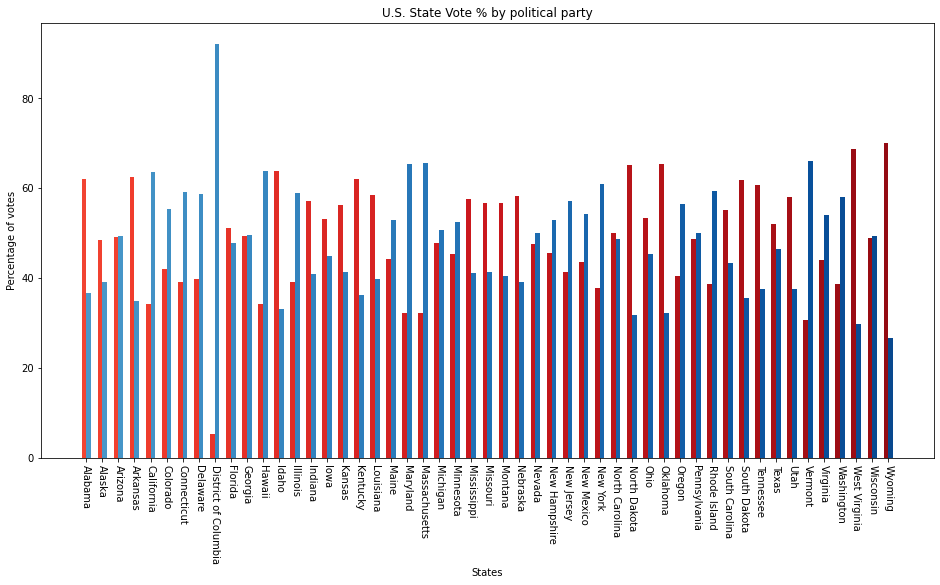

In [33]:
color_1 = plt.cm.Reds(np.linspace(0.6, 1, 66))
color_2 = plt.cm.Blues(np.linspace(0.6, 1, 66))

data1 = states['votes REP president perc']
data2 = states['Voted for DEM president (percent)']

plt.figure(figsize=(16,8))
x = np.arange(51)
ax1 = plt.subplot(1,1,1)
w = 0.3

color = color_1
plt.title('U.S. State Vote % by political party')
plt.xticks(x + w /2, data1.index, rotation=-90)
ax1.set_xlabel('States')
ax1.set_ylabel('Percentage of votes')
ax1.bar(x,data1.values,color=color_1,width=w,align='center')

color = color_2
ax2 = ax1
ax2.bar(x + w,data2, color=color_2,width=w,align='center')

plt.show()

In [34]:
!pip install adjustText

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=c6600114591a9fb06ef1e1b6a93439708f7e72b0c9d2e76fd8287a37779a6ffb
  Stored in directory: c:\users\rahul_j\appdata\local\pip\cache\wheels\08\17\ca\9b56027427d0a46e5696312ad2bc4e8a47620d31a25c473d44
Successfully built adjustText


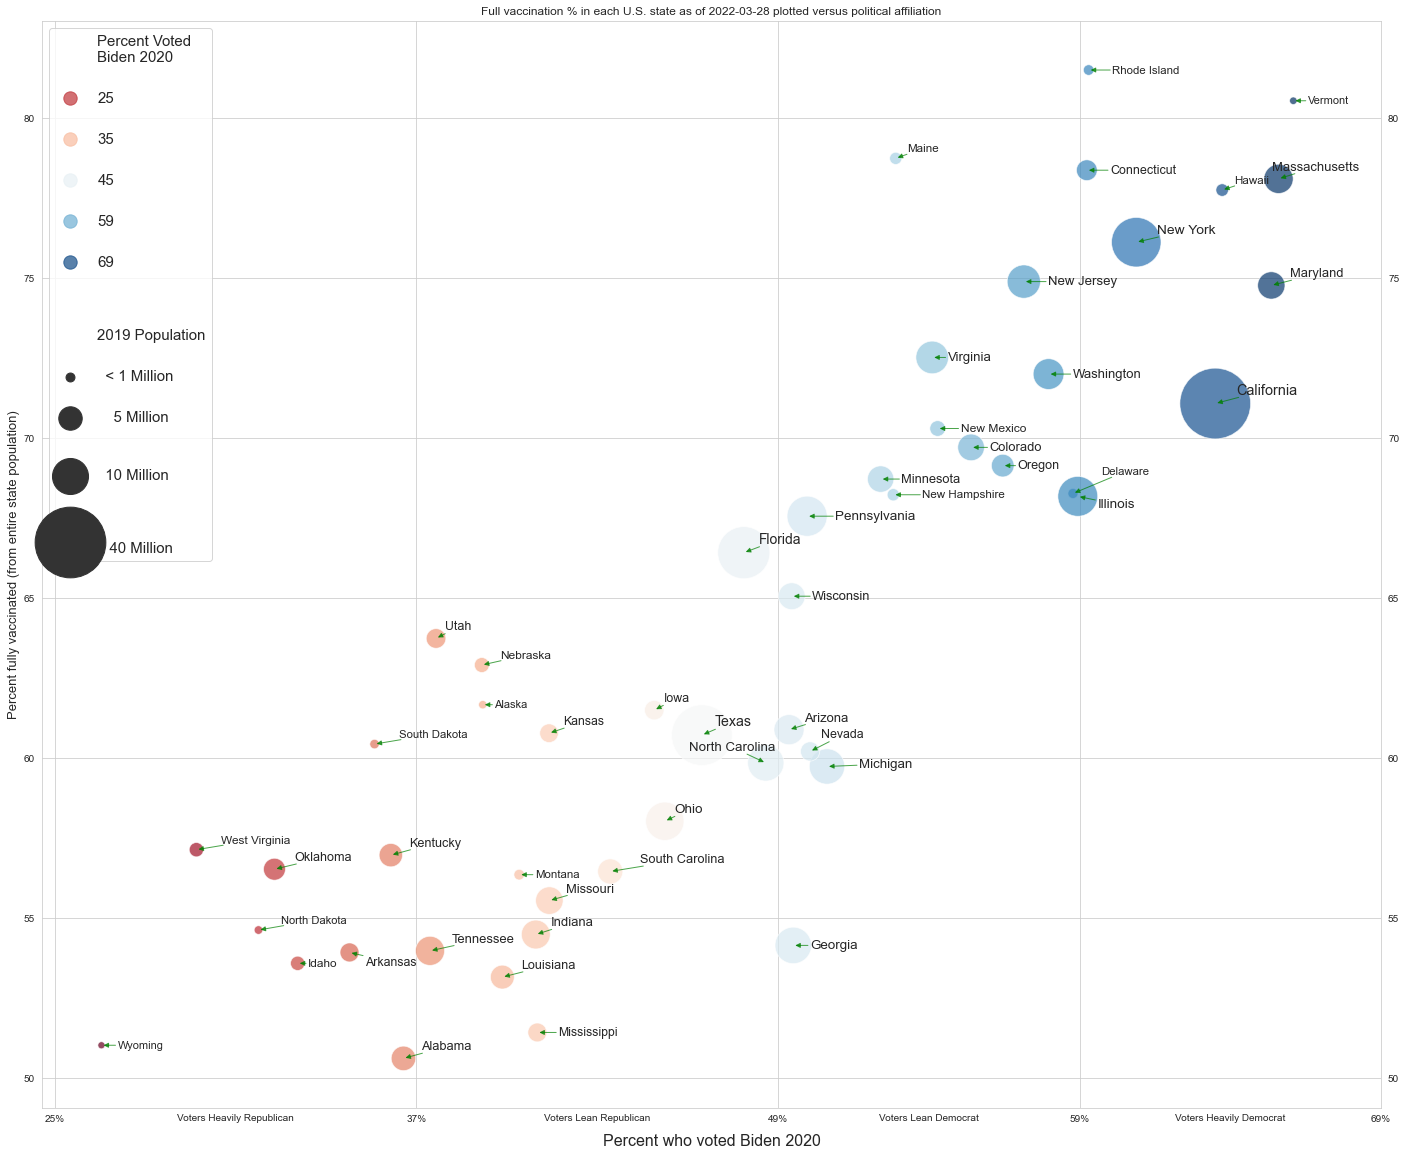

Key U.S. Vaccine Approval Dates:
January 2021: Approved for ages 65 and over
March 2021: Approved for ages 18 and over
April 2021: Approved for ages 16 and over
May 2021: Approved for ages 12 and over (85% of U.S.)
November 2021: Approved for ages 6 and over(93.5% of U.S.)


In [35]:
from adjustText import adjust_text

sns.set_style("whitegrid")

plt.figure(figsize=(24,20))
plt.title("Full vaccination % in each U.S. state as of " + str(freshDate) + " plotted versus political affiliation")

vote_color_alpha = .7
ax = sns.scatterplot(x=geodf['Voted for DEM president (percent)'],
                     y=geodf["% Fully Vaccinated as of " + str(freshDate)],
                     size=geodf["POPESTIMATE2019"], sizes=(50, 5000),
                     hue=geodf['Voted for DEM president (percent)'], palette='RdBu', alpha=vote_color_alpha, ) # hue_norm=(27,72)
# stretch out color range by setting hue_norm tighter than full range (and keep alpha high), but note that bubbles in middle can be hard to see

ax.set(xticks=[25, 37, 49, 59, 69])
ax.set(xticklabels=['25%', '37%', '49%', '59%', '69%'])
ax.set_xticks([31, 43, 54, 64], minor=True)
ax.set_xticklabels(['Voters Heavily Republican','Voters Lean Republican','Voters Lean Democrat','Voters Heavily Democrat'], minor=True)

ax.tick_params(labelright=True)

# the code below puts in custom values for population to solve two issues:
# 1) poorly chosen population values without units
# 2) crowded legend
pop_handles = [80, 550, 1300, 5000]
pop_labels = ['\n\n2019 Population', '  < 1 Million', '    5 Million', '\n  10 Million\n', '\n   40 Million']
vote_labels = ['Percent Voted\nBiden 2020', '25', '35', '45', '59', '69']
handles, labels = ax.get_legend_handles_labels()
for i in range(11):
    if i == 0:
        labels[i] = vote_labels[i] 
    elif i < 6: # vote
        handles[i].set_sizes([180])
        handles[i].set_alpha(vote_color_alpha)
#         handles[i].set_color('red') # couldn't figure out how to set color based on value
        labels[i] = vote_labels[i]
    elif i >= 6: # population
        handles[i].set_sizes([pop_handles[i-7]])
        labels[i] = pop_labels[i-6]

# plt.legend(loc='upper left', labelspacing=1.8, fontsize=15)
plt.legend(handles, labels, loc='upper left', labelspacing=1.8, fontsize=15)

# greatly reduces overlapping annotations text
texts = []
for x, y, text, text_size in zip(geodf['Voted for DEM president (percent)'].values,
                                 geodf["% Fully Vaccinated as of " + str(freshDate)].values,
                                 geodf.STATE.values,
                                 geodf.POPESTIMATE2019.transform(np.log10).values):
    texts.append(ax.text(x, y, text, fontsize=1.9*text_size)) # if you think the text is too small for the smallest countries, change 7 to a higher number
adjust_text(texts, force_text=(.3,.6), force_points=(1.4,1.3), expand_points=(1.5,1.5), ha="left", autoalign=False, lim=10,
            arrowprops=dict(arrowstyle="-|>",color='g', alpha=0.7))

plt.xlabel("Percent who voted Biden 2020", fontsize=16, labelpad=10)
plt.ylabel("Percent fully vaccinated (from entire state population)", fontsize=13)
plt.show()

print("Key U.S. Vaccine Approval Dates:")
print("January 2021: Approved for ages 65 and over")
print("March 2021: Approved for ages 18 and over")
print("April 2021: Approved for ages 16 and over")
print("May 2021: Approved for ages 12 and over (85% of U.S.)")
print("November 2021: Approved for ages 6 and over(93.5% of U.S.)")

# if this cell fails, it is probably because of a nan value. For example, the following may have a nan value:
# geodf["% Fully Vaccinated as of " + str(freshDate)].values

In [36]:
geodf["% Fully Vaccinated as of " + str(freshDate)].values

array([50.61, 61.66, 60.88, 53.92, 71.07, 69.7 , 78.36, 68.26, 66.41,
       54.14, 77.74, 53.58, 68.17, 54.48, 61.49, 60.77, 56.96, 53.15,
       78.73, 74.76, 78.09, 59.73, 68.71, 51.42, 55.54, 56.35, 62.9 ,
       60.2 , 68.22, 74.88, 70.29, 76.11, 59.84, 54.62, 58.02, 56.52,
       69.13, 67.55, 81.49, 56.45, 60.43, 53.97, 60.71, 63.73, 80.53,
       72.51, 71.99, 57.13, 65.05, 51.02])

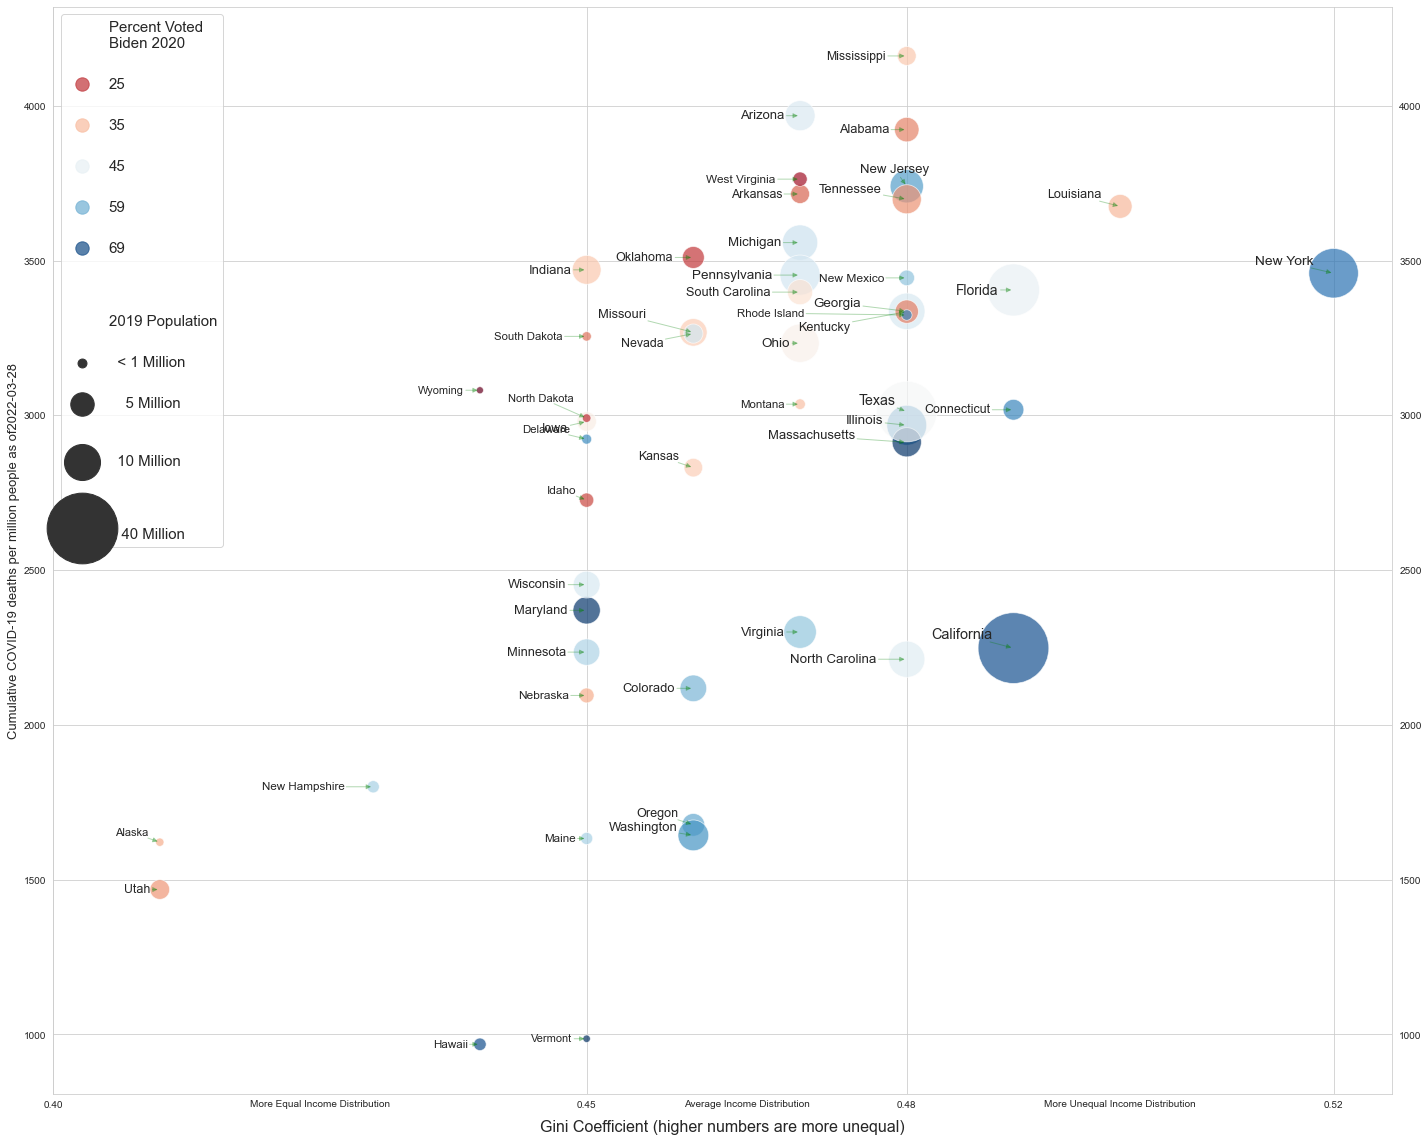

In [37]:
from adjustText import adjust_text

sns.set_style("whitegrid")

plt.figure(figsize=(24,20))

vote_color_alpha = .7
ax = sns.scatterplot(x=geodf['Gini'],
                     y=geodf["Cum COVID Deaths per 1M Pop through " + str(freshDate)],
                     size=geodf["POPESTIMATE2019"], sizes=(50, 5000),
                     hue=geodf['Voted for DEM president (percent)'], palette='RdBu', alpha=vote_color_alpha, ) # hue_norm=(27,72)
# stretch out color range by setting hue_norm tighter than full range (and keep alpha high)

ax.set(xticks=[.40, .45, .48, .52])
# ax.set(xticklabels=[???])
ax.set_xticks([.425, .465, .50], minor=True)
ax.set_xticklabels(['More Equal Income Distribution','Average Income Distribution','More Unequal Income Distribution'], minor=True)

ax.tick_params(labelright=True)

# the code below puts in custom values for population to solve two issues:
# 1) poorly chosen population values without units
# 2) crowded legend
pop_handles = [80, 550, 1300, 5000]
pop_labels = ['\n\n2019 Population', '  < 1 Million', '    5 Million', '\n  10 Million\n', '\n   40 Million']
vote_labels = ['Percent Voted\nBiden 2020', '25', '35', '45', '59', '69']
handles, labels = ax.get_legend_handles_labels()
for i in range(11):
    if i == 0:
        labels[i] = vote_labels[i] 
    elif i < 6: # vote
        handles[i].set_sizes([180])
        handles[i].set_alpha(vote_color_alpha)
#         handles[i].set_color('red') # couldn't figure out how to set color based on value
        labels[i] = vote_labels[i]
    elif i >= 6: # population
        handles[i].set_sizes([pop_handles[i-7]])
        labels[i] = pop_labels[i-6]

plt.legend(handles, labels, loc='upper left', labelspacing=1.8, fontsize=15)

# greatly reduces overlapping annotations text
texts = []
for x, y, text, text_size in zip(geodf['Gini'].values,
                                 geodf["Cum COVID Deaths per 1M Pop through " + str(freshDate)].values,
                                 geodf.STATE.values,
                                 geodf.POPESTIMATE2019.transform(np.log10).values):
    texts.append(ax.text(x, y, text, fontsize=1.9*text_size)) # if you think the text is too small for the smallest countries, change 7 to a higher number
adjust_text(texts, force_text=(.3,.6), force_points=(1.4,1.3), expand_points=(1.5,1.5), ha="right", autoalign=False, lim=10,
            arrowprops=dict(arrowstyle="-|>",color='g', alpha=0.3))

plt.xlabel("Gini Coefficient (higher numbers are more unequal)", fontsize=16, labelpad=10)
plt.ylabel("Cumulative COVID-19 deaths per million people as of" + str(freshDate), fontsize=13)
plt.show()

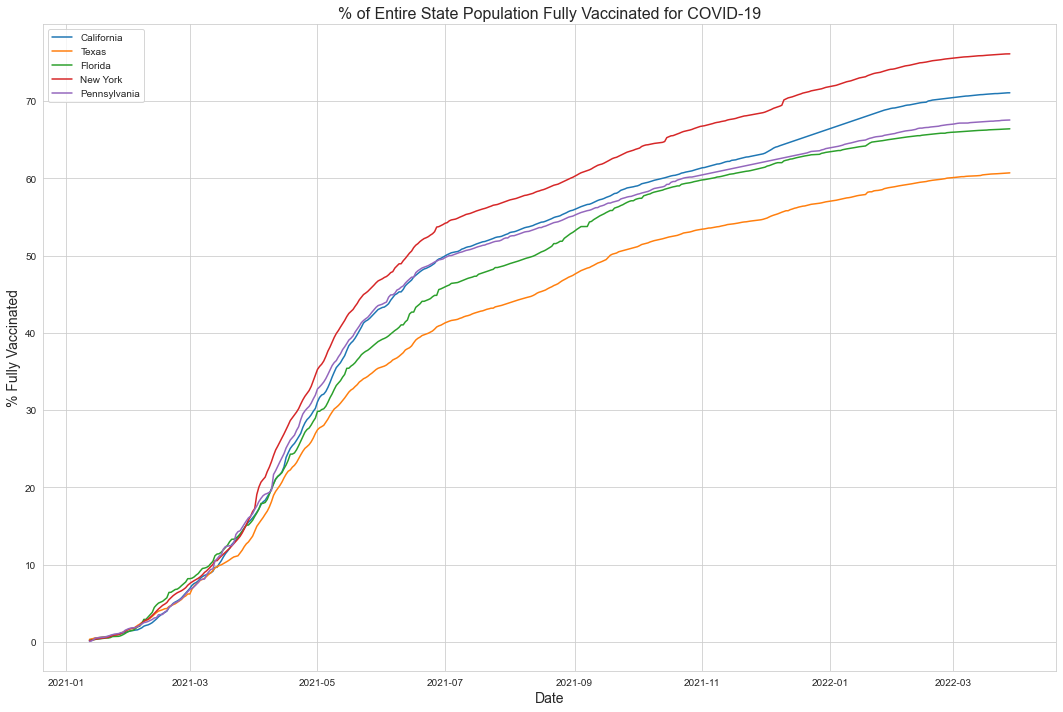

In [38]:
sns.set_style("whitegrid")

plt.figure(figsize=(15,10))
plt.title("% of Entire State Population Fully Vaccinated for COVID-19", fontsize=16)
plt.ylabel("% Fully Vaccinated", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.tight_layout()

for state in ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania']:
    ax = sns.lineplot(data=vaccinationData[vaccinationData['location']==state], x='date', y='people_fully_vaccinated_per_hundred', label=state)
    
plt.show()

In [39]:
political_level_dict = {1: 0, 2: 37, 3: 49, 4: 59, 5: 69}
pop_level_dict = {1: 0, 2: 2000000, 3: 8000000, 4: 50000000}
gini_level_dict = {1: 0, 2: .45, 3: .48, 4: 1.00}

political_level_words_dict = {1: "Very Republican", 2: "Somewhat Republican", 3: "Somewhat Democrat", 4: "Very Democrat"}
pop_level_words_dict = {1: "LOW", 2: "MEDIUM", 3: "HIGH"}
gini_level_words_dict = {1: "MORE EQUAL", 2: "AVERAGE EQUALITY", 3: "LESS EQUAL"}

geodf['political_level'] = 1 + 1*(geodf['Voted for DEM president (percent)'] >= political_level_dict[2]) + 1*(geodf['Voted for DEM president (percent)'] >= political_level_dict[3]) + 1*(geodf['Voted for DEM president (percent)'] >= political_level_dict[4])
geodf['pop_level'] = 1 + 1*(geodf.POPESTIMATE2019 >= pop_level_dict[2]) + 1*(geodf.POPESTIMATE2019 >= pop_level_dict[3])
geodf['gini_level'] = 1 + 1*(geodf.Gini >= gini_level_dict[2]) + 1*(geodf.Gini >= gini_level_dict[3])
geodf.tail(5).T

C:\Users\Rahul_J\anaconda3\envs\geo_env\lib\site-packages\pandas\core\dtypes\inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
C:\Users\Rahul_J\anaconda3\envs\geo_env\lib\site-packages\pandas\core\dtypes\inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
C:\Users\Rahul_J\anaconda3\envs\geo_env\lib\site-packages\pandas\io\formats\printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
C:\Users\R

45  \
STATE                                                                                    Virginia   
POPESTIMATE2019                                                                           8535519   
lat                                                                                     37.538857   
long                                                                                    -77.43364   
people_vaccinated                                                                       7253022.0   
people_fully_vaccinated                                                                 6189235.0   
percent_vaccinated                                                                          84.97   
% Fully Vaccinated as of 2022-03-28                                                         72.51   
Gini                                                                                         0.47   
cases                                                                                     1666422   
deaths                                                                                      19631   
Cum COVID Cases per 1M Pop through 2022-03-28                                            195234.0   
Cum COVID Deaths per 1M Pop through 2022-03-28                                             2300.0   
votes REP president                                                                       1962430   
votes DEM president                                                                       2413568   
votes OTHER president                                                                       84526   
Total votes                                                                               4460524   
votes REP president perc                                                                     44.0   
Voted for DEM president (percent)                                                           54.11   
votes OTHER president perc                                                                   1.89   
id                                                                                             VA   
geometry                                        (POLYGON ((-75.397659 38.013497, -75.244304 38...   
political_level                                                                                 3   
pop_level                                                                                       3   
gini_level                                                                                      2   

                                                                                               46  \
STATE                                                                                  Washington   
POPESTIMATE2019                                                                           7614893   
lat                                                                                     47.035805   
long                                                                                  -122.905014   
people_vaccinated                                                                       6109646.0   
people_fully_vaccinated                                                                 5482267.0   
percent_vaccinated                                                                          80.23   
% Fully Vaccinated as of 2022-03-28                                                         71.99   
Gini                                                                                         0.46   
cases                                                                                     1453919   
deaths                                                                                      12515   
Cum COVID Cases per 1M Pop through 2022-03-28                                            190931.0   
Cum COVID Deaths per 1M Pop through 2022-03-28                                             1643.0   
votes REP president                                   

In [40]:
def create_levels_summary_df(df, lev_type, level_words_dict, level_dict):
    summary_df = df[lev_type + '_level'].value_counts().sort_index().rename_axis(lev_type + '_level').reset_index(name='counts')
    summary_df[lev_type + '_level_label'] = summary_df[lev_type + '_level'].map(level_words_dict)
    summary_df[lev_type + '_min'] = summary_df[lev_type + '_level'].map(level_dict)
    summary_df[lev_type + '_max'] = summary_df[lev_type + '_level'].transform(lambda x: x + 1).map(level_dict) # transform adds 1 to input for mapped dict
    return summary_df

political_summary_df = create_levels_summary_df(geodf, 'political', political_level_words_dict, political_level_dict)
pop_summary_df = create_levels_summary_df(geodf, 'pop', pop_level_words_dict, pop_level_dict)
gini_summary_df = create_levels_summary_df(geodf, 'gini', gini_level_words_dict, gini_level_dict)

df = pd.merge(geodf[['STATE', 'political_level', 'pop_level', 'gini_level']], vaccinationData, how="right", left_on='STATE', right_on='location').drop(columns="location")
covid_cumulative = pd.merge(geodf[['STATE', 'political_level', 'pop_level', 'gini_level', 'POPESTIMATE2019']], covid_cumulative, how="right", left_on='STATE', right_on='state').drop(columns="state")
covid_cumulative.dropna(inplace=True)
covid_cumulative["Deaths per 1M"] = 1000000 * covid_cumulative["deaths"] / covid_cumulative["POPESTIMATE2019"]
covid_cumulative["Deaths per 1M"] = covid_cumulative["Deaths per 1M"].round(0)

weekly_by_political_level = df.groupby([pd.Grouper(key="date", freq="1W"), 'political_level']).mean().reset_index()

display(political_summary_df, pop_summary_df, gini_summary_df)

political_level  counts political_level_label  political_min  political_max
0                1       9       Very Republican              0             37
1                2      16   Somewhat Republican             37             49
2                3      17     Somewhat Democrat             49             59
3                4       8         Very Democrat             59             69

pop_level  counts pop_level_label  pop_min   pop_max
0          1      14             LOW        0   2000000
1          2      24          MEDIUM  2000000   8000000
2          3      12            HIGH  8000000  50000000

gini_level  counts  gini_level_label  gini_min  gini_max
0           1       5        MORE EQUAL      0.00      0.45
1           2      28  AVERAGE EQUALITY      0.45      0.48
2           3      17        LESS EQUAL      0.48      1.00

IndexError: list assignment index out of range

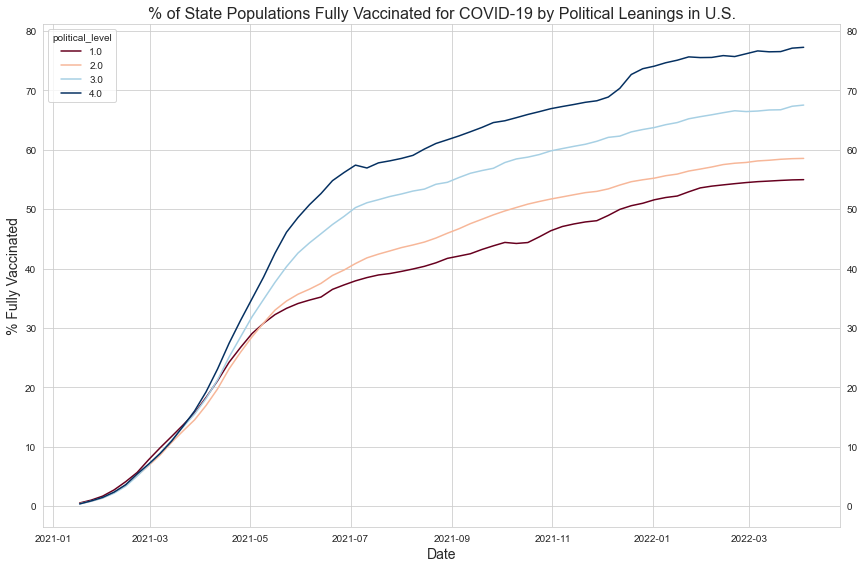

In [41]:
# plot full vaccination over time by political level

sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
plt.title("% of State Populations Fully Vaccinated for COVID-19 by Political Leanings in U.S.", fontsize=16)
plt.ylabel("% Fully Vaccinated", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.tight_layout()

ax = sns.lineplot(data=weekly_by_political_level, x='date', y='people_fully_vaccinated_per_hundred',
                  hue='political_level', palette='RdBu')
ax.tick_params(labelright=True)

handles, labels = ax.get_legend_handles_labels()
for i in range(5):
    if i == 0:
        labels[i] = 'Political Leaning'
    else:
             labels[i] = political_level_words_dict[i]
reversed_handles = [handles[0]] + handles[4:0:-1]
reversed_labels = [labels[0]] + labels[4:0:-1]

plt.legend(reversed_handles, reversed_labels, loc='upper left', labelspacing=1.8, fontsize=15)
plt.legend(handles, labels, loc='upper left', labelspacing=1.8, fontsize=15)

plt.show()

In [42]:
import math
import re
from decimal import Decimal
import matplotlib.dates as mdates

# https://lost-stats.github.io/Presentation/Figures/line_graph_with_labels_at_the_beginning_or_end.html
def label_end_of_lines(ax, fig, lines, extra_txts):
#     print(lines)
    for line, name, extra_txt in zip(ax.lines, lines, extra_txts):
#         print(name)
        y = line.get_ydata()[-1]
        x = line.get_xdata()[-1]
        if np.issubdtype(x.dtype, np.datetime64): # can't be dateTime so had had to add this hack.
            x = mdates.date2num(line.get_xdata()[-1]) #  Why was it storing dateTime to begin with?
            
        if not np.isfinite(y):
            y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
        if not np.isfinite(y) or not np.isfinite(x):
            continue
        text = ax.annotate(name + " " + extra_txt,
                           xy=(x, y),
                           xytext=(4, 0),
                           color=line.get_color(),
                           xycoords=(ax.get_xaxis_transform(),
                                     ax.get_yaxis_transform()),
#                            arrowprops=dict(arrowstyle="->", color=line.get_color()), # not needed
                           textcoords="offset points")
        text_width = (text.get_window_extent(fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
        if np.isfinite(text_width):
            ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)
            

# https://github.com/azaitsev/millify/tree/master/millify
def remove_exponent(d):
    return d.quantize(Decimal(1)) if d == d.to_integral() else d.normalize()

def millify(n, precision=1, drop_nulls=False, prefixes=[]):
    millnames = ['', 'k', 'M', 'B', 'T', 'P', 'E', 'Z', 'Y']
    if prefixes:
        millnames = ['']
        millnames.extend(prefixes)
    n = float(n)
    millidx = max(0, min(len(millnames) - 1,
                         int(math.floor(0 if n == 0 else math.log10(abs(n)) / 3))))
    result = '{:.{precision}f}'.format(n / 10**(3 * millidx), precision=precision)
    if drop_nulls:
        result = remove_exponent(Decimal(result))
    return '{0}{dx}'.format(result, dx=millnames[millidx])

In [43]:
covid_cumulative = covid_cumulative.sort_values(by=['POPESTIMATE2019', 'date'], ascending=[False, True]).reset_index()
geodf = geodf.sort_values(by=['POPESTIMATE2019'], ascending=False).reset_index()

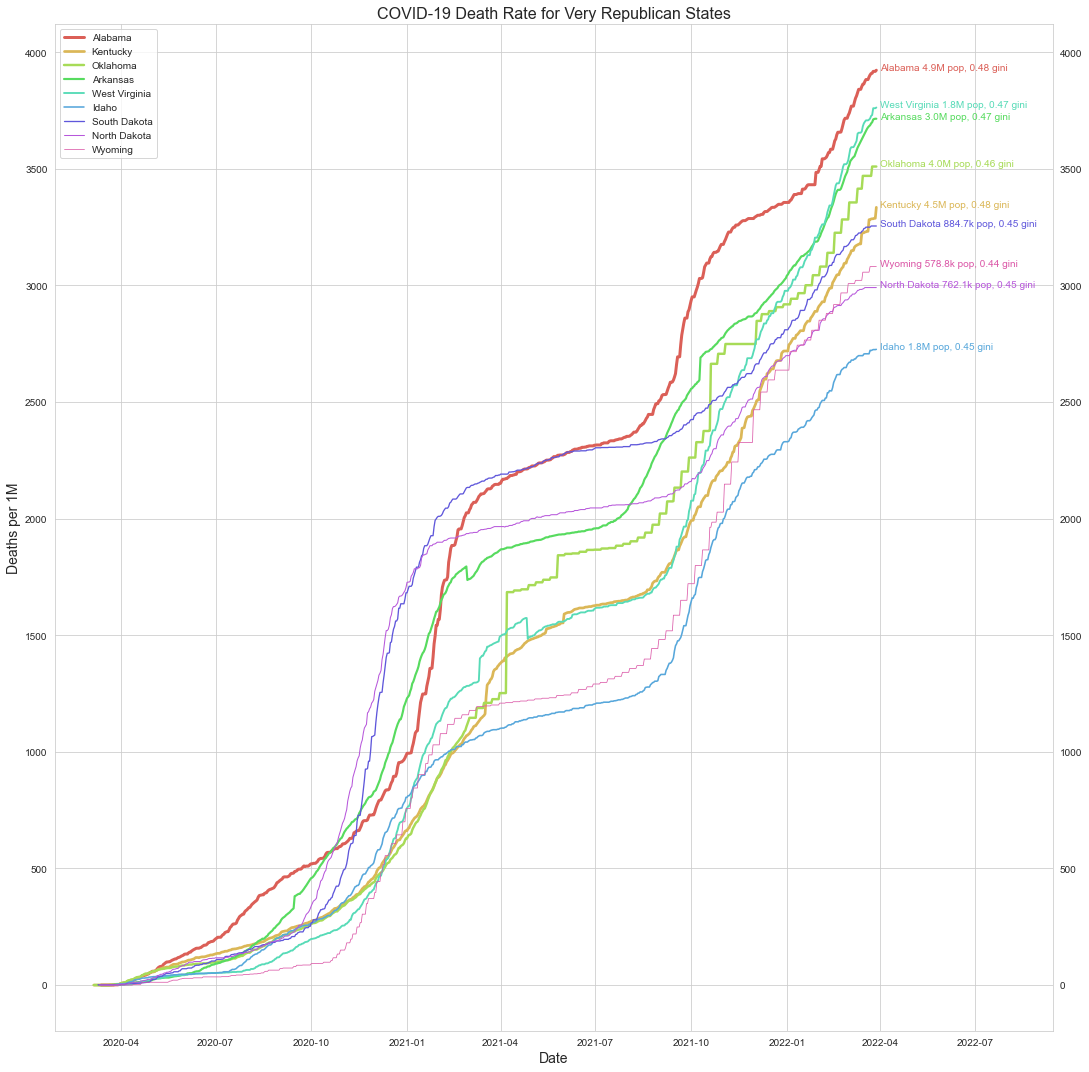

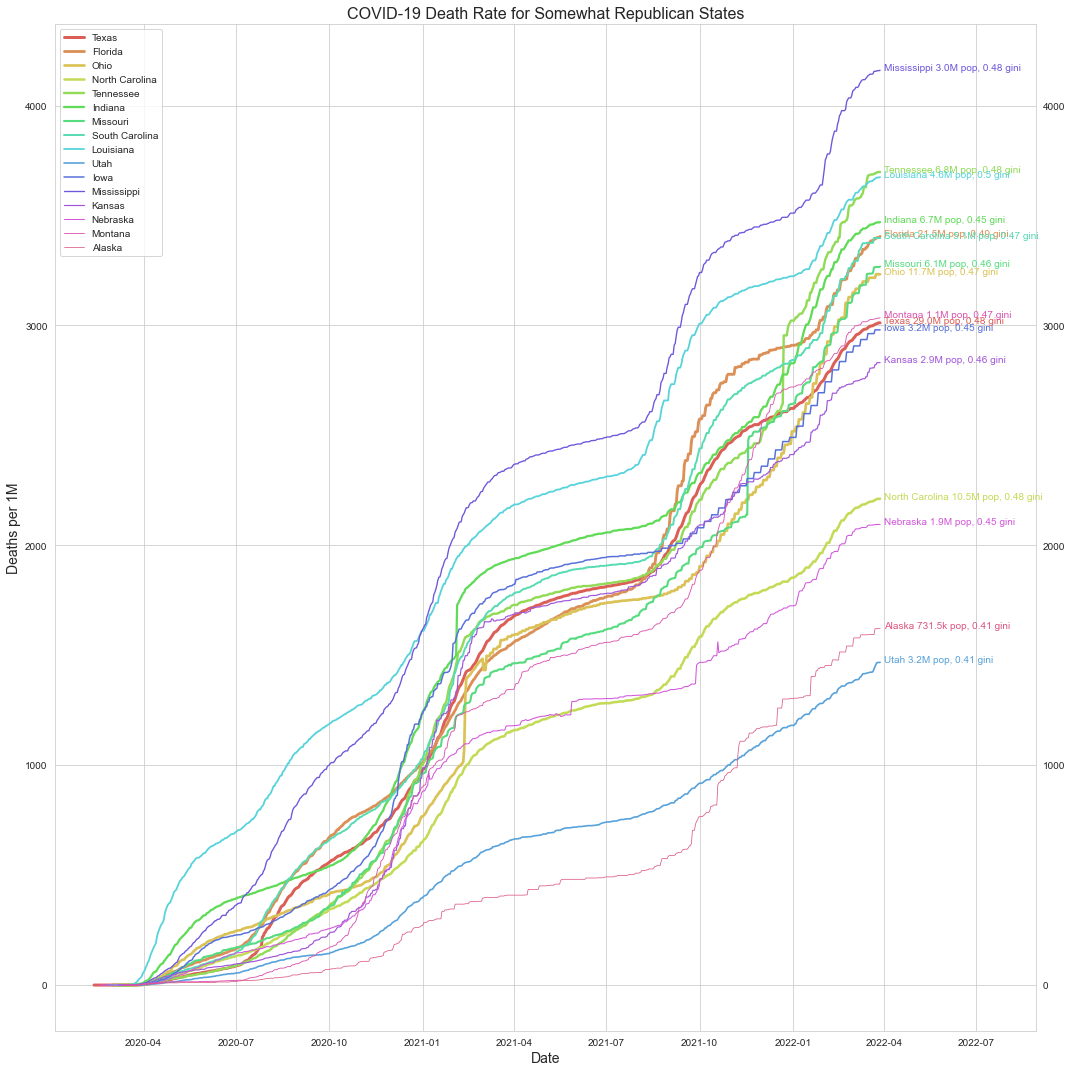

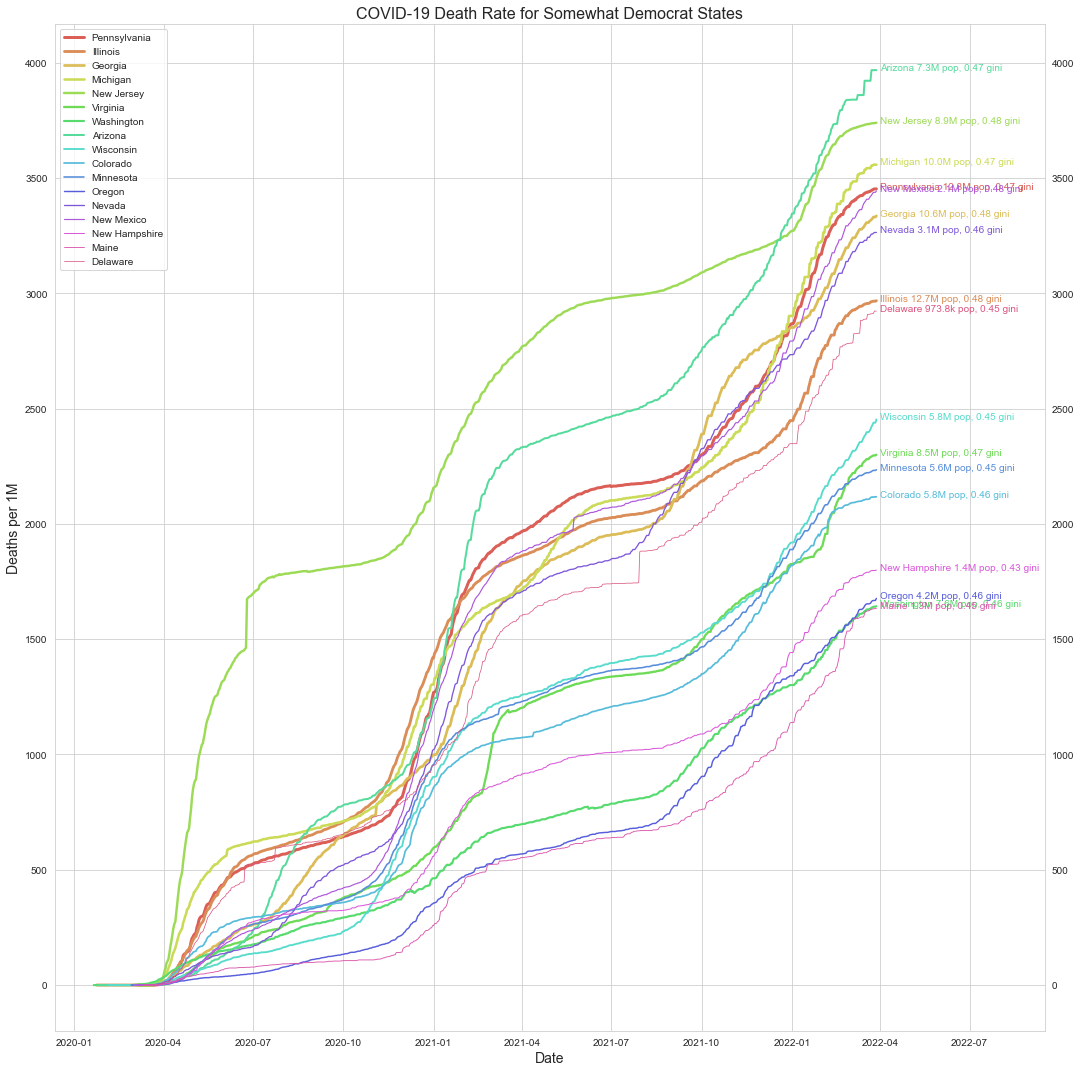

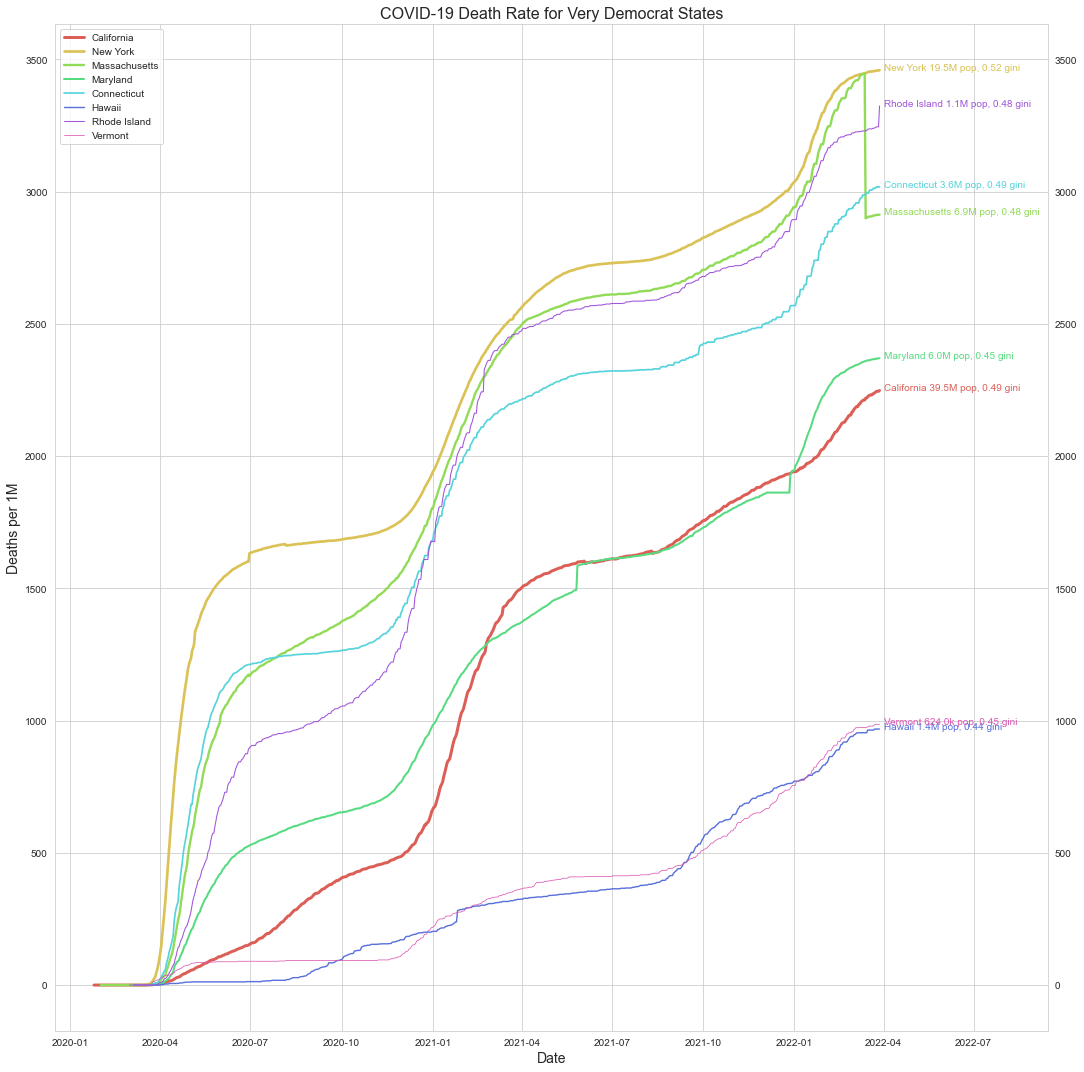

In [44]:
for political_level_to_plot in range(1,5):
    state_list = list(geodf[geodf['political_level']==political_level_to_plot].STATE.unique())
    fig, ax = plt.subplots(figsize=(15,15))
    plt.title("COVID-19 Death Rate for " + political_level_words_dict[political_level_to_plot] + " States", fontsize=16)
    palette = sns.color_palette('hls', len(state_list))

    sns.lineplot(ax=ax, data=covid_cumulative[covid_cumulative['political_level']==political_level_to_plot],
                 x=covid_cumulative['date'], y=covid_cumulative["Deaths per 1M"],
                 hue='STATE', size='STATE', palette=palette)
    # both dfs sorted in advance by population so that high populations have thick lines. This helps readability.
    # Also needed so that the lines match the labels
    # Possible but harder to do without advance df sort: https://seaborn.pydata.org/generated/seaborn.lineplot.html
    extra_text_annotations = []
    for st in state_list:
        extra_text_annotations.append(str(millify(geodf[geodf.STATE==st].POPESTIMATE2019.values[0])) + " pop, " +
                                      str(geodf[geodf.STATE==st].Gini.values[0]) + " gini")
    label_end_of_lines(ax, fig, state_list, extra_text_annotations)

    plt.ylabel("Deaths per 1M", fontsize=14)
    plt.xlabel("Date", fontsize=14)
    plt.tight_layout()
    ax.tick_params(labelright=True)
    plt.legend(loc="upper left")
    plt.show()


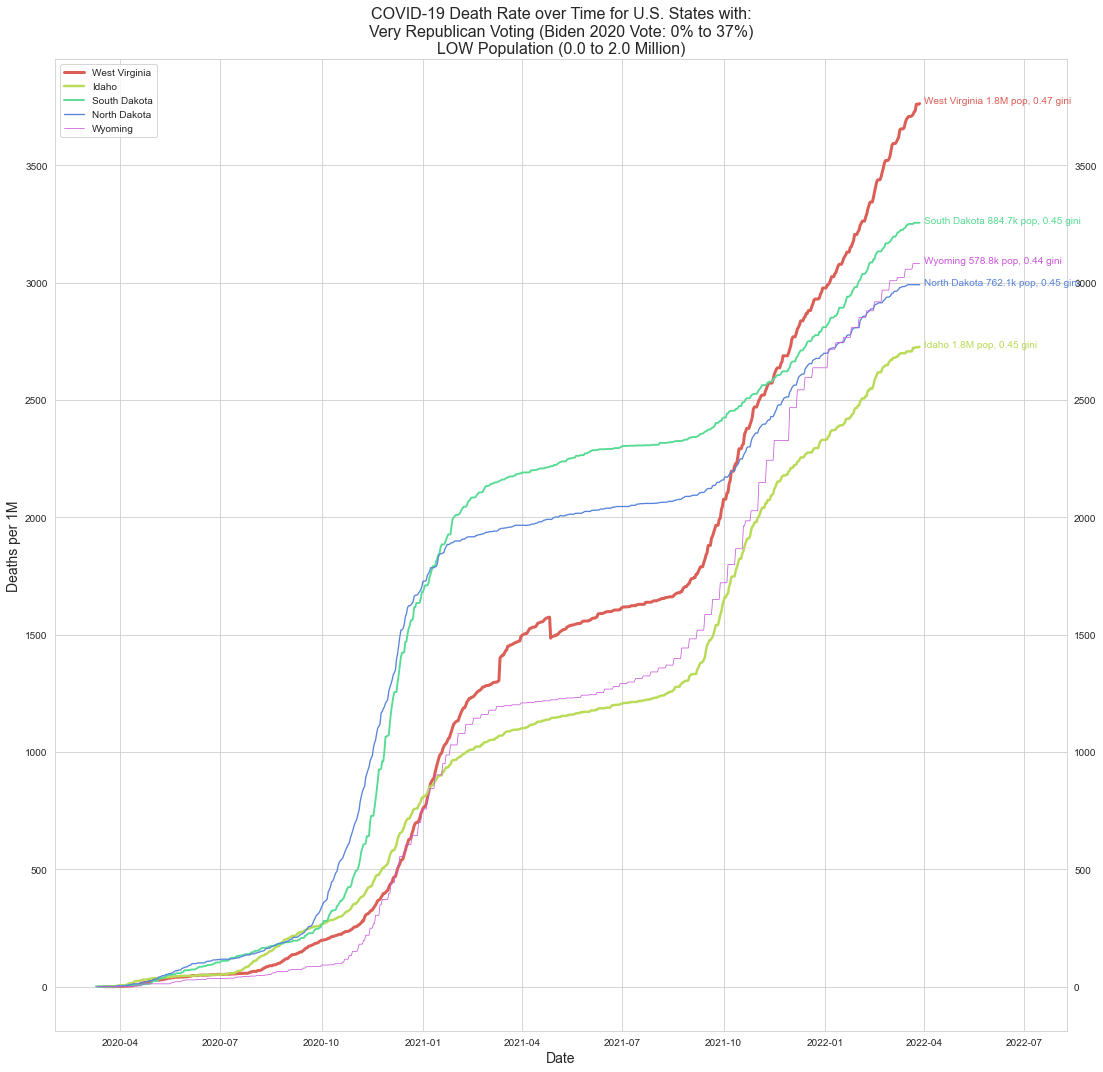

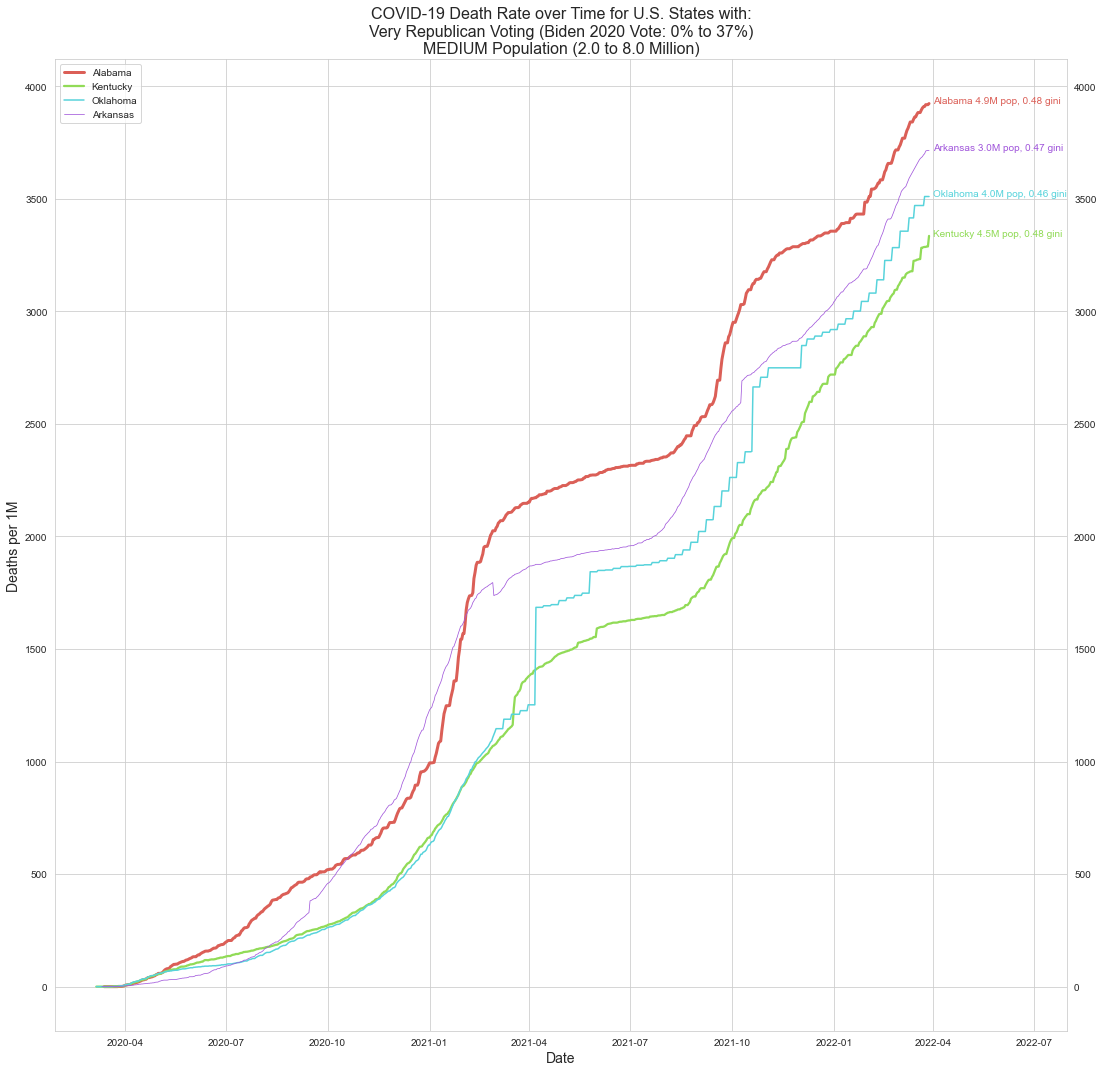

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


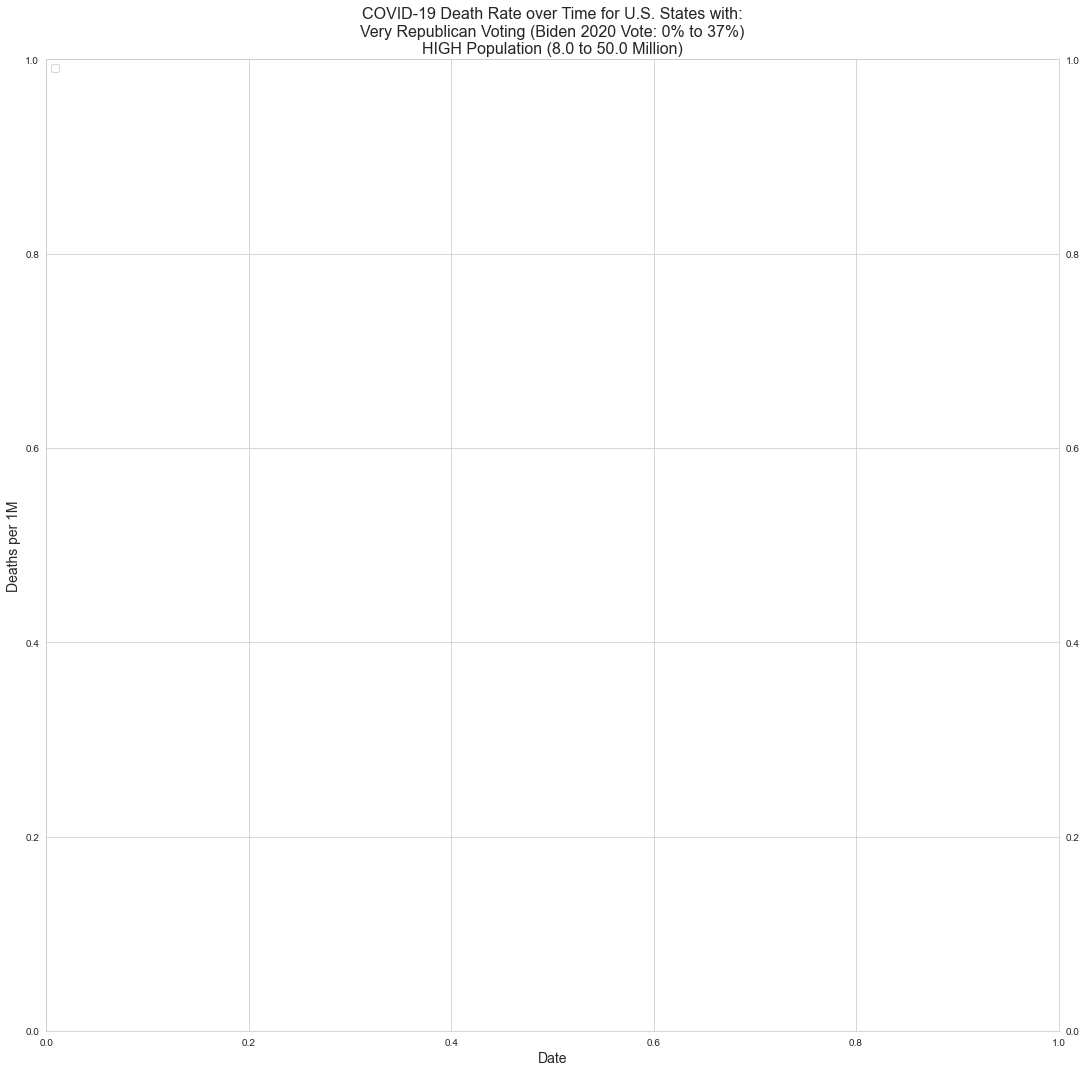

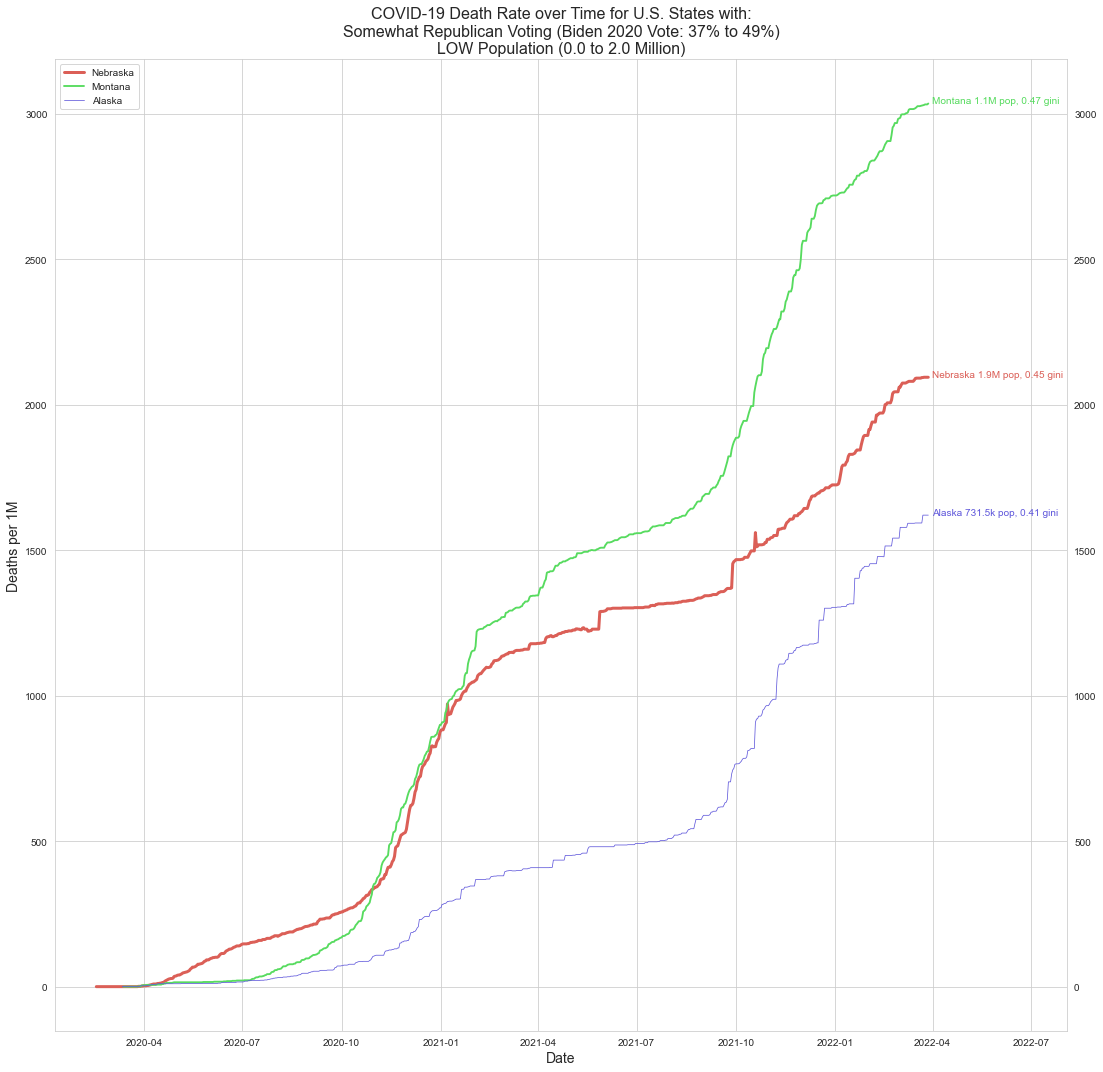

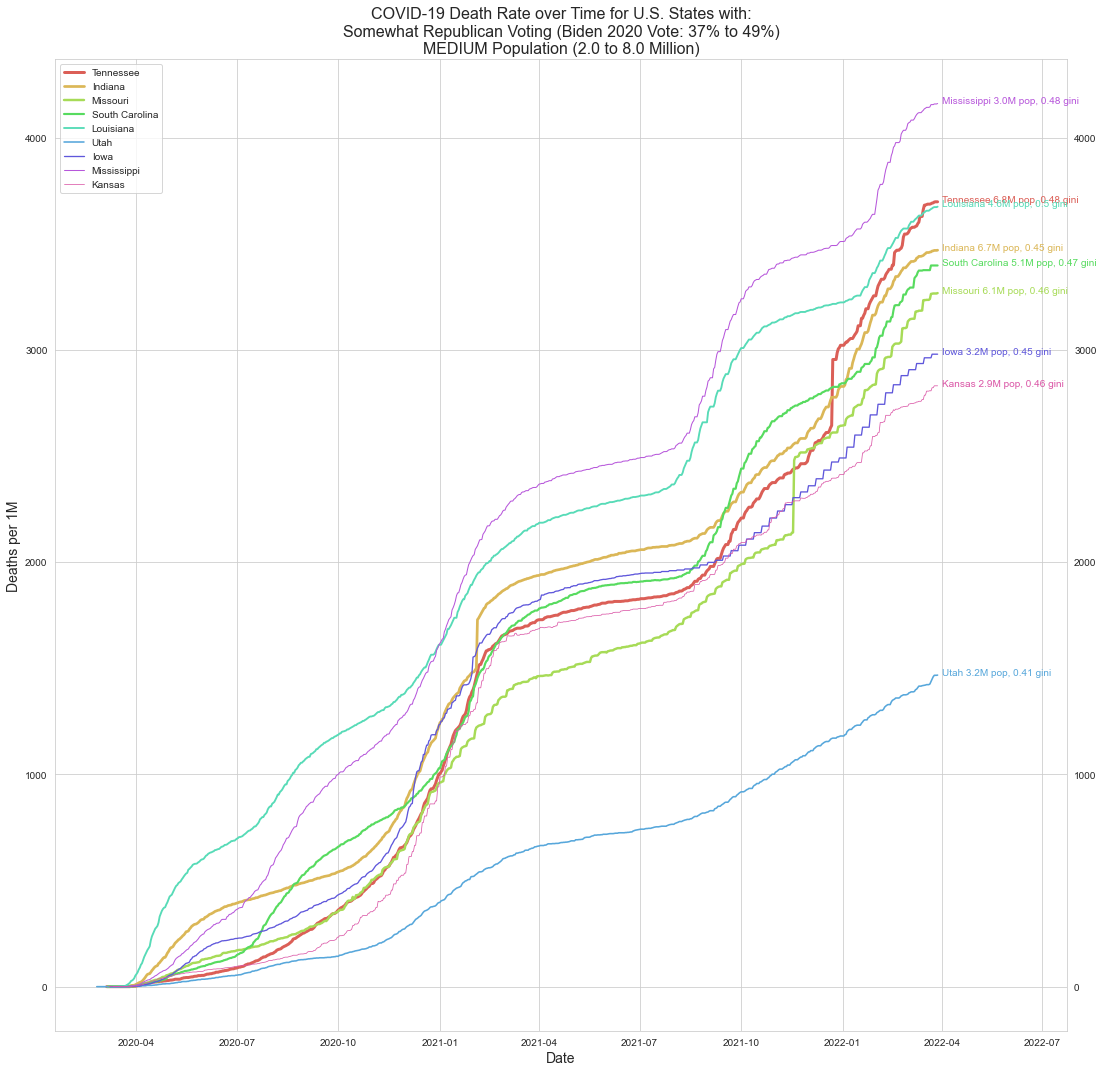

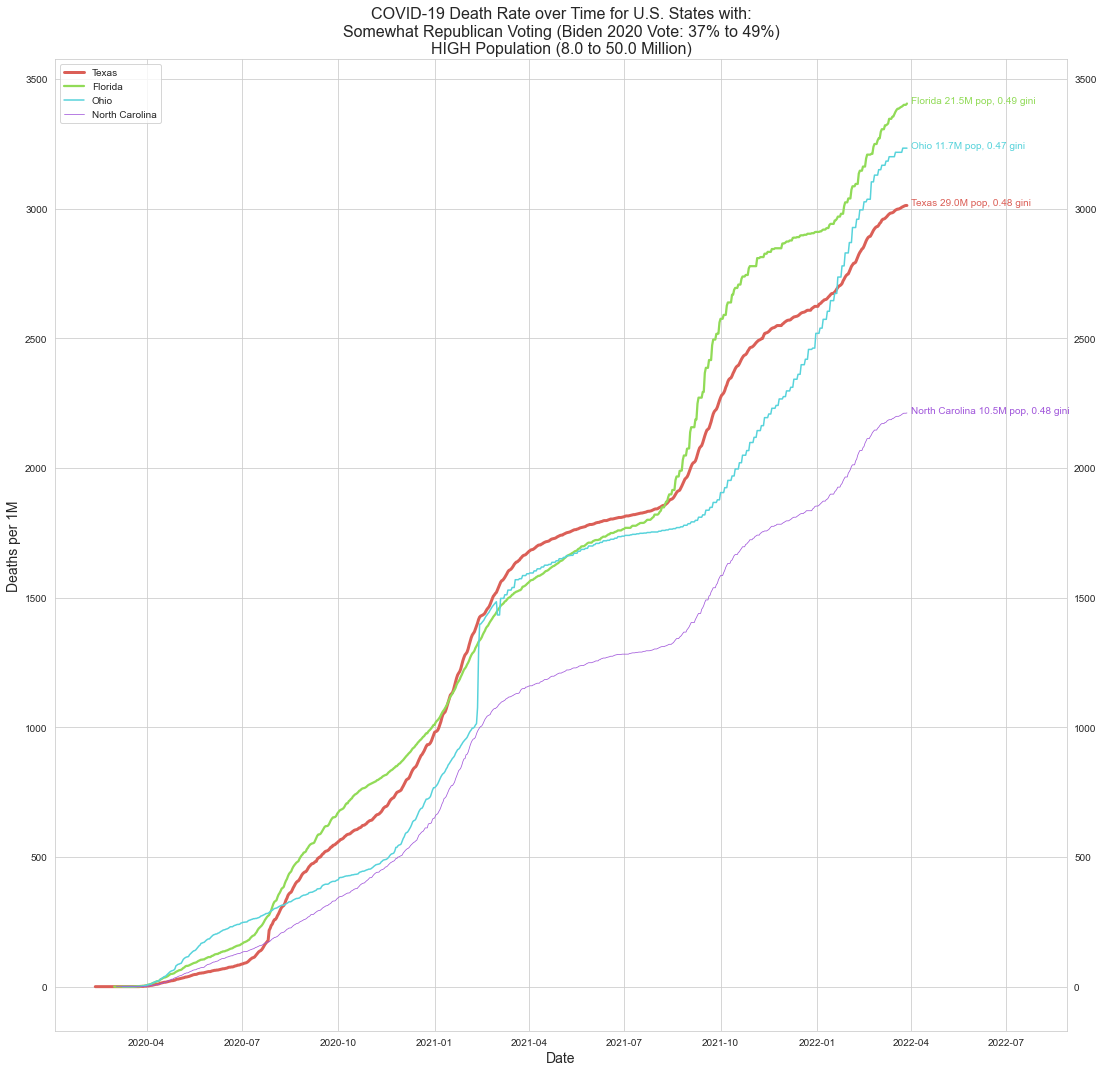

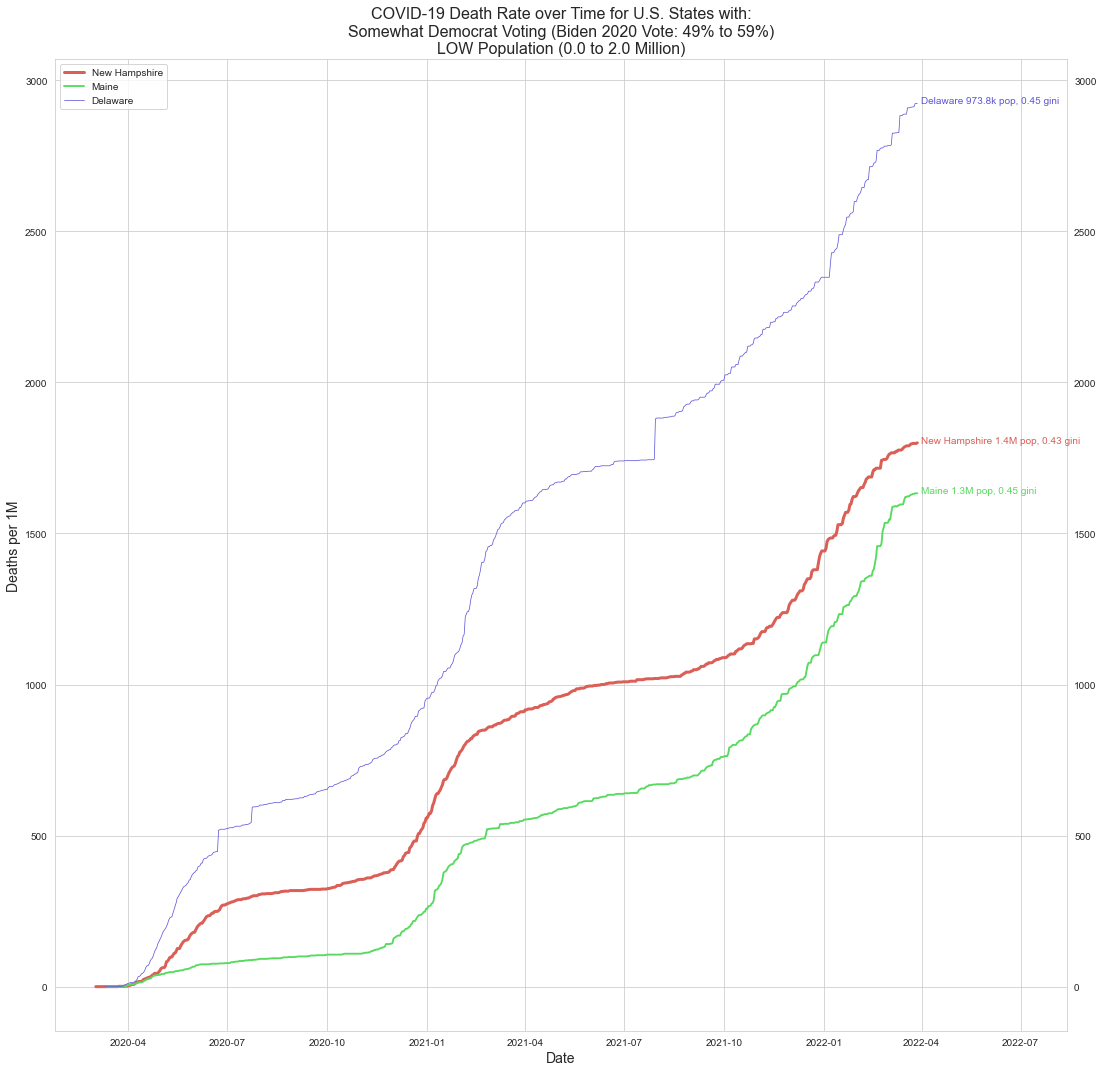

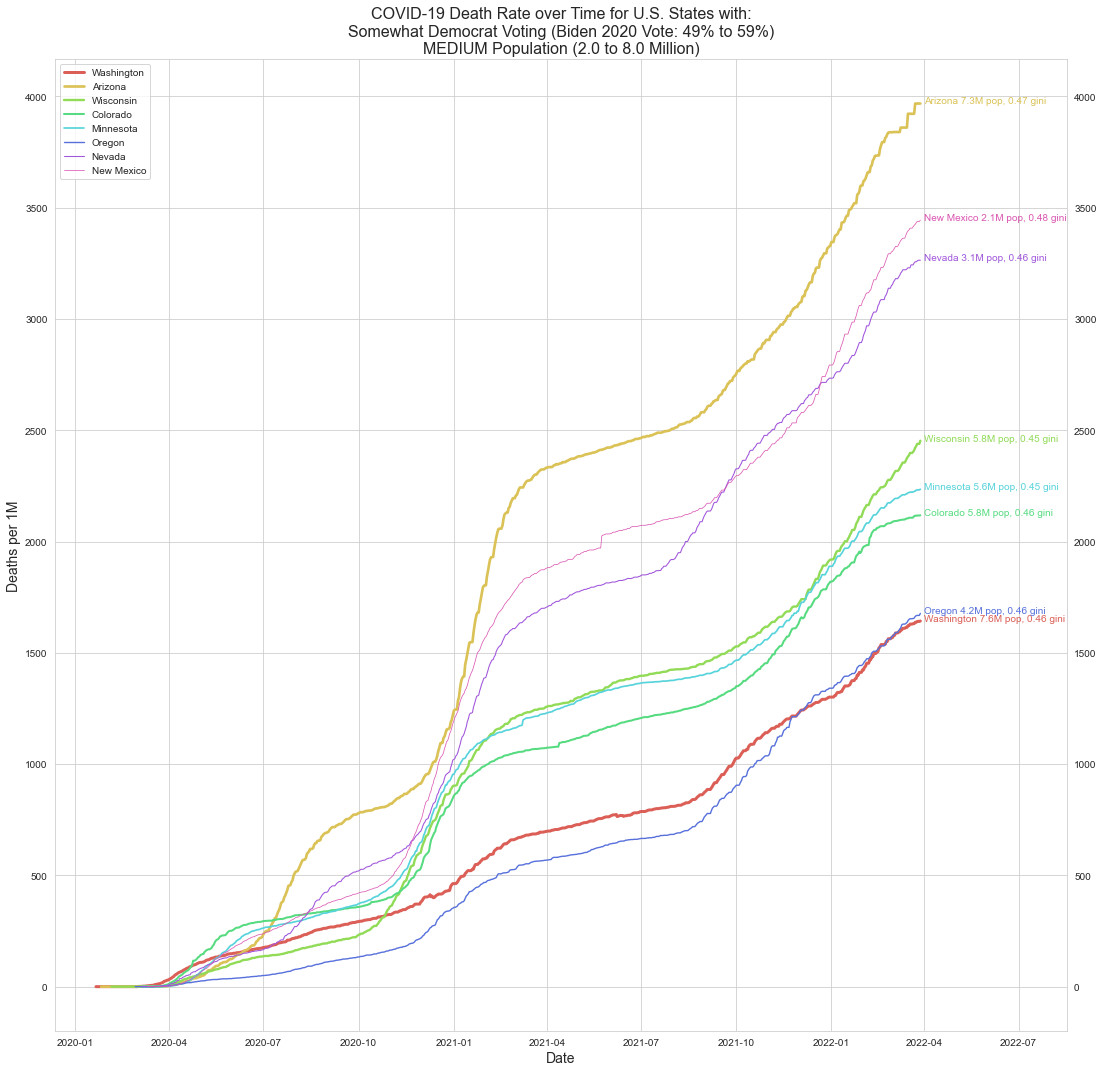

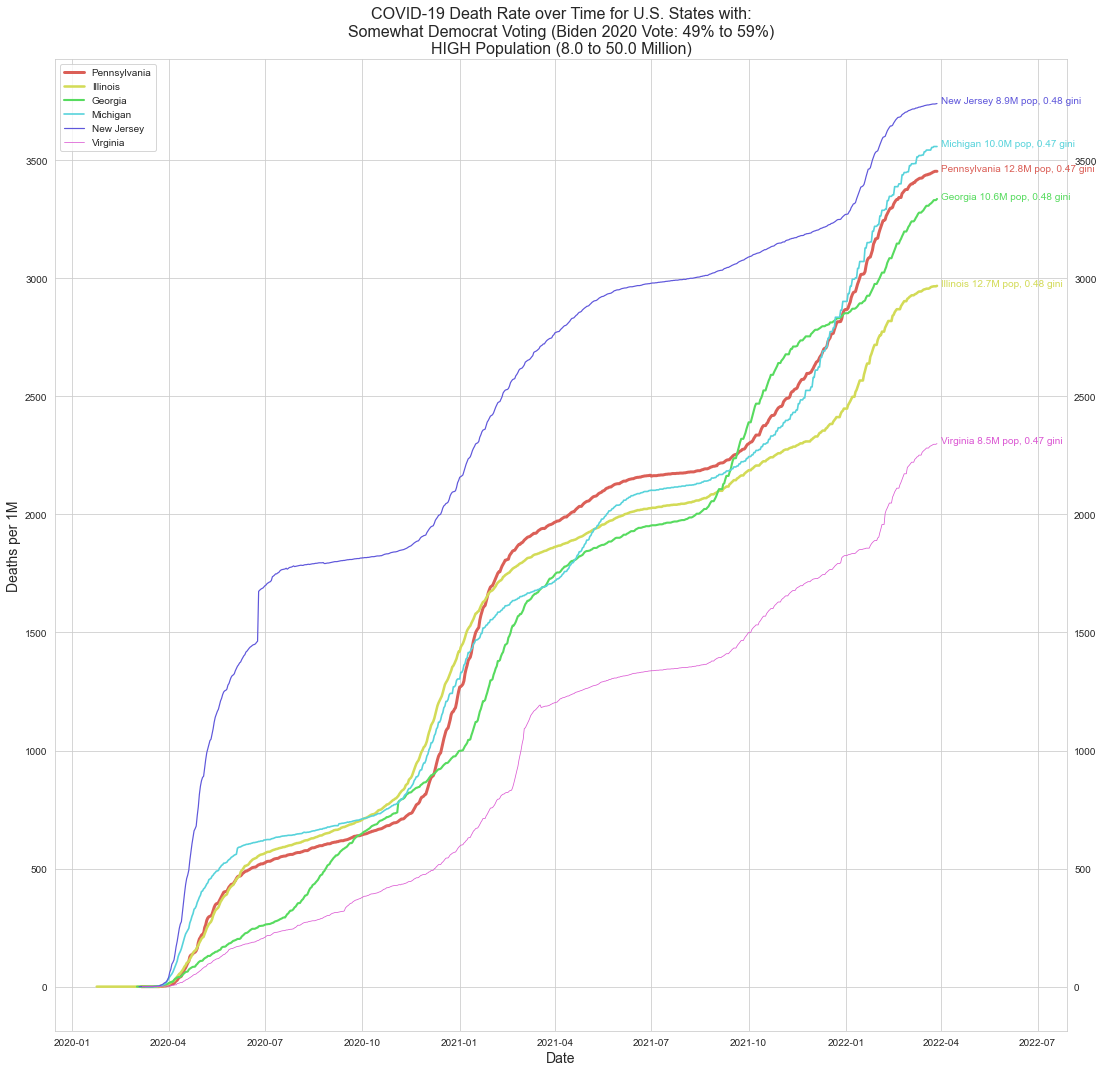

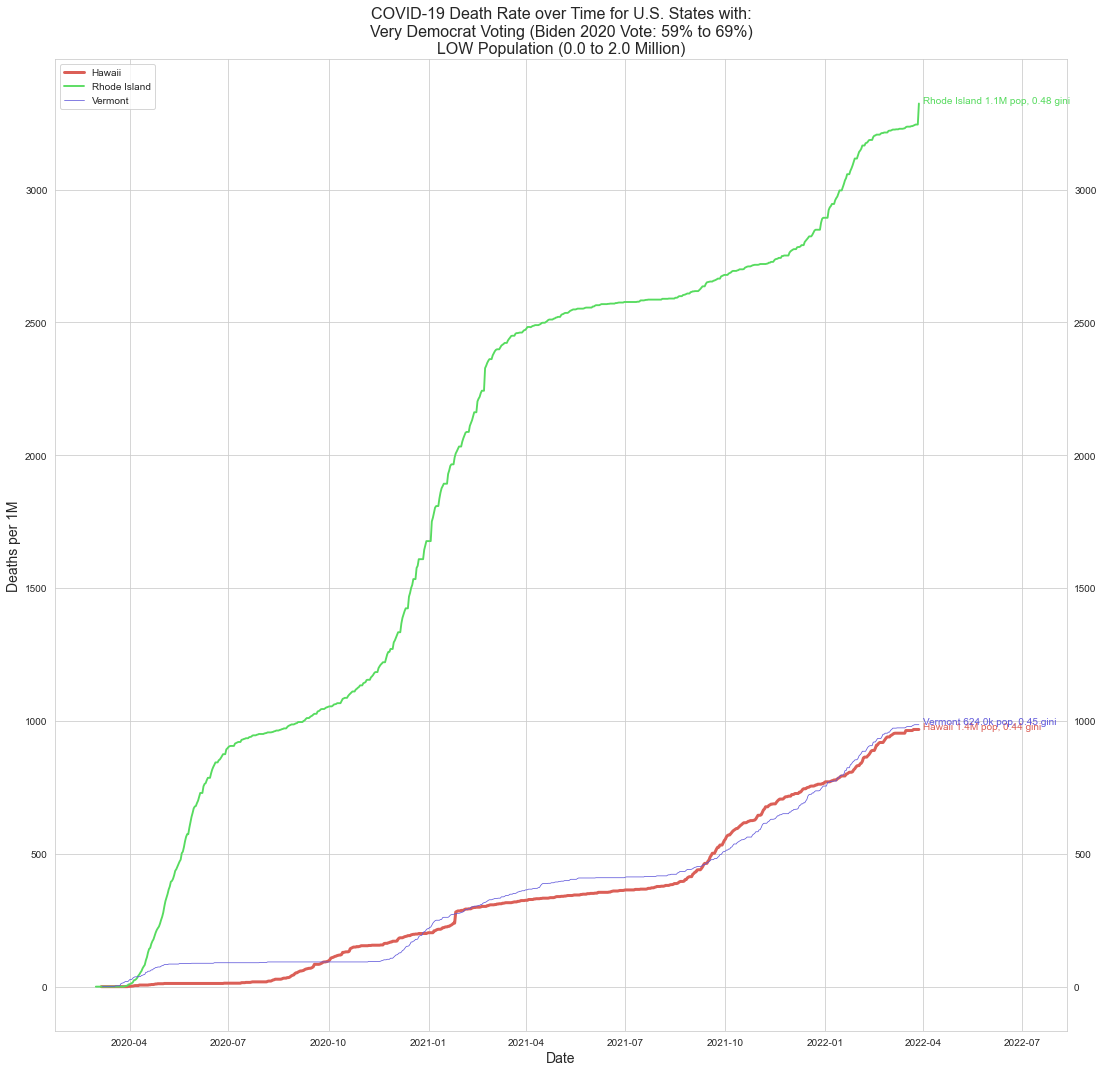

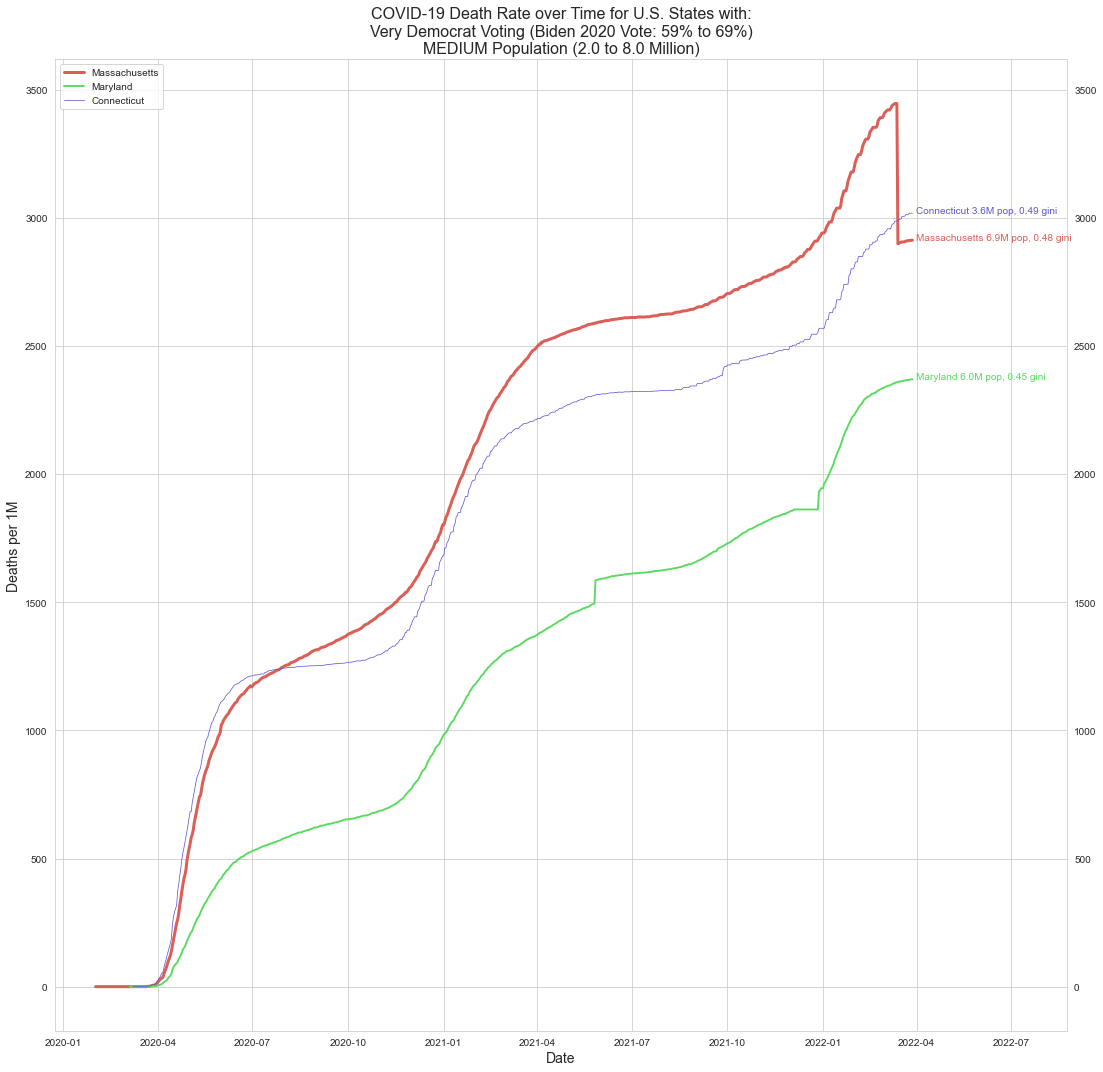

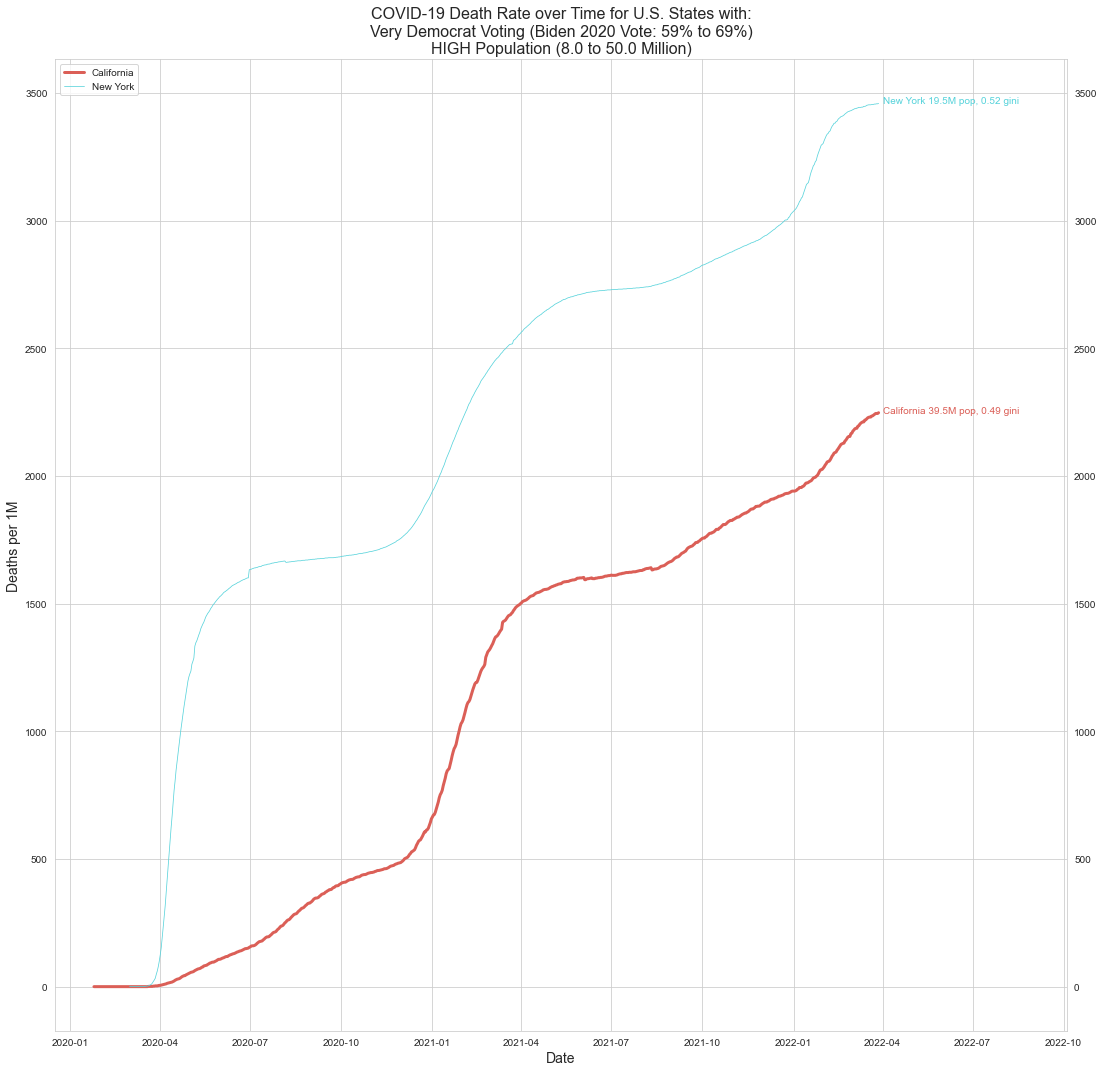

In [45]:
for political_level_to_plot in range(1,5):
    for pop_level_to_plot in range(1,4): # population levels range from lowest (1) to highest (3)
        df_plot_data = covid_cumulative[(covid_cumulative['political_level']==political_level_to_plot) &
                                        (covid_cumulative['pop_level']==pop_level_to_plot)]
        state_list = list(df_plot_data.STATE.unique())
        states_to_plot = df_plot_data.STATE

        fig, ax = plt.subplots(figsize=(15,15))
        plt.title("COVID-19 Death Rate over Time for U.S. States with:\n"
                  + political_level_words_dict[political_level_to_plot] + " Voting (Biden 2020 Vote: "
                  + str(political_level_dict[political_level_to_plot]) + "% to " + str(political_level_dict[political_level_to_plot+1]) + "%)\n"
                  + pop_level_words_dict[pop_level_to_plot] + " Population ("
                  + str(pop_level_dict[pop_level_to_plot]/1000000) + " to " + str(pop_level_dict[pop_level_to_plot+1]/1000000) + " Million)",
                  fontsize=16)

        plt.ylabel("Deaths per 1M", fontsize=14)
        plt.xlabel("Date", fontsize=14)
        plt.tight_layout()
        palette = sns.color_palette('hls', len(state_list))
        sns.lineplot(ax=ax, data=df_plot_data, x='date', y="Deaths per 1M", hue=states_to_plot, size=states_to_plot, palette=palette)
        # df was sorted in advance by [population, date] so that high populations have thick lines. This helps readability.
        # Without doing this sort in advance, it's still possible but more work: https://seaborn.pydata.org/generated/seaborn.lineplot.html

        extra_text_annotations = []
        for st in state_list:
            extra_text_annotations.append(str(millify(geodf[geodf.STATE==st].POPESTIMATE2019.values[0])) + " pop, " +
                                          str(geodf[geodf.STATE==st].Gini.values[0]) + " gini")
        label_end_of_lines(ax, fig, state_list, extra_text_annotations)
        ax.tick_params(labelright=True)
        plt.legend(loc="upper left")
        plt.show()

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [76]:
percent_vaccinated_map = folium.Map(location=[41.3,-100.3], tiles='cartodbpositron', zoom_start=4)

Choropleth(geo_data=state_geo,
           data=geo_df,
           columns=["STATE", "% Fully Vaccinated as of " + str(freshDate)],
           key_on = 'properties.name', # Feature.id replaced. See: https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json
           fill_color = 'RdYlGn',
           alpha=.9,
           bins=[50, 55, 60, 65, 70, 75, 80, 85],
           legend_name = 'Percent of Entire State Population Fully Vaccinated' # (approximately 15% of population not eligible to receive COVID-19 Vaccine)
          ).add_to(percent_vaccinated_map)

# Add hover functionality.
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
GeoJSON_features = folium.features.GeoJson(
    data = geo_df,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=["STATE", "% Fully Vaccinated as of " + str(freshDate), "percent_vaccinated", "people_fully_vaccinated", "people_vaccinated", "POPESTIMATE2019", "votes REP president perc", "Voted for DEM president (percent)", "votes OTHER president perc"],
        aliases=["State", "<br>Full Vaccination %", "Vaccination % (At Least Partly)", "Fully Vaccinated", "At Least Partly Vaccinated", "<br>2019 Population", "2020 pres vote REP %", "2020 pres vote DEM %", "2020 pres vote OTHER %"],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
percent_vaccinated_map.add_child(GeoJSON_features)
percent_vaccinated_map.keep_in_front(GeoJSON_features)

display(percent_vaccinated_map)

print("Key U.S. Vaccine Approval Dates:")
print("January 2021: Approved for ages 65 and over")
print("March 2021: Approved for ages 18 and over")
print("April 2021: Approved for ages 16 and over")
print("May 2021: Approved for ages 12 and over (85% of U.S.)")
print("November 2021: Approved for ages 6 and over(93.5% of U.S.)")

Key U.S. Vaccine Approval Dates:
January 2021: Approved for ages 65 and over
March 2021: Approved for ages 18 and over
April 2021: Approved for ages 16 and over
May 2021: Approved for ages 12 and over (85% of U.S.)
November 2021: Approved for ages 6 and over(93.5% of U.S.)
